### Problem Statement

"Optimize Incident Management and Resolution Process"

Objective: The objective of this problem statement is to improve the efficiency and effectiveness of the incident management and resolution process within the IT company. This can involve several specific goals, which may include but are not limited to:

Minimize Incident Resolution Time: Reduce the time it takes to resolve incidents to meet or exceed Service Level Agreements (SLAs) and improve customer satisfaction.

Maximize Resource Utilization: Ensure that support groups and analysts are appropriately allocated and that incidents are assigned to the right teams and individuals.

Streamline Incident Handling: Optimize the reassignment process to minimize disruptions and delays in incident resolution.

Enhance User Satisfaction: Improve the overall quality of service, ensuring that users' issues are addressed promptly and effectively.

Proactively Identify and Address Issues: Identify common root causes of incidents and develop proactive measures to prevent their recurrence.

Automate Incident Prioritization: Use the provided attributes, such as 'impact' and 'urgency,' to develop automated systems for incident prioritization.

Leverage Knowledge Base: Promote the use of knowledge base documents to resolve incidents, reducing the need for manual intervention.

Ensure Data Accuracy and Compliance: Implement checks to confirm the accuracy of priority assignments and ensure that notifications and compliance standards are met.

Improve Communication and Collaboration: Enhance communication and collaboration within support groups and with users to facilitate faster incident resolution.

Monitor and Report: Continuously monitor and report on incident management performance, providing insights for ongoing improvements.

The specific problem statement and objectives may vary depending on the company's priorities and challenges. By addressing these objectives, the IT company aims to create a more efficient, customer-focused, and responsive incident management process that benefits both the organization and its

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import variation 
import statistics
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score,  recall_score
       
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report

from sklearn.ensemble import BaggingClassifier


In [2]:
df = pd.read_csv('incident_event_log.csv')

df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


1. number: incident identifier (24,918 different values);
2. incident state: eight levels controlling the incident management process transitions from opening until closing the case;
3. active: boolean attribute that shows whether the record is active or closed/canceled;
4. reassignment_count: number of times the incident has the group or the support analysts changed;
5. reopen_count: number of times the incident resolution was rejected by the caller;
6. sys_mod_count: number of incident updates until that moment;
7. made_sla: boolean attribute that shows whether the incident exceeded the target SLA;
8. caller_id: identifier of the user affected;
9. opened_by: identifier of the user who reported the incident;
10. opened_at: incident user opening date and time;
11. sys_created_by: identifier of the user who registered the incident;
12. sys_created_at: incident system creation date and time;
13. sys_updated_by: identifier of the user who updated the incident and generated the current log record;
14. sys_updated_at: incident system update date and time;
15. contact_type: categorical attribute that shows by what means the incident was reported;
16. location: identifier of the location of the place affected;
17. category: first-level description of the affected service;
18. subcategory: second-level description of the affected service (related to the first level description, i.e., to category);
19. u_symptom: description of the user perception about service availability;
20. cmdb_ci: (confirmation item) identifier used to report the affected item (not mandatory);
21. impact: description of the impact caused by the incident (values: 1â€“High; 2â€“Medium; 3â€“Low);
22. urgency: description of the urgency informed by the user for the incident resolution (values: 1â€“High; 2â€“Medium; 3â€“Low);
23. priority: calculated by the system based on 'impact' and 'urgency';
24. assignment_group: identifier of the support group in charge of the incident;
25. assigned_to: identifier of the user in charge of the incident;
26. knowledge: boolean attribute that shows whether a knowledge base document was used to resolve the incident;
27. u_priority_confirmation: boolean attribute that shows whether the priority field has been double-checked;
28. notify: categorical attribute that shows whether notifications were generated for the incident;
29. problem_id: identifier of the problem associated with the incident;
30. rfc: (request for change) identifier of the change request associated with the incident;
31. vendor: identifier of the vendor in charge of the incident;
32. caused_by: identifier of the RFC responsible by the incident;
33. close_code: identifier of the resolution of the incident;
34. resolved_by: identifier of the user who resolved the incident;
35. resolved_at: incident user resolution date and time (dependent variable);
36. closed_at: incident user close date and time (dependent variable).

df

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [4]:
df.isnull().sum()

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
cmdb_ci                    0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
problem_id                 0
rfc                        0
vendor                     0
caused_by                  0
closed_code                0
resolved_by                0
resolved_at   

In [5]:
df.replace('?', np.NaN, inplace = True)
df.isnull().sum()

number                          0
incident_state                  0
active                          0
reassignment_count              0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
caller_id                      29
opened_by                    4835
opened_at                       0
sys_created_by              53076
sys_created_at              53076
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
location                       76
category                       78
subcategory                   111
u_symptom                   32964
cmdb_ci                    141267
impact                          0
urgency                         0
priority                        0
assignment_group            14213
assigned_to                 27496
knowledge                       0
u_priority_confirmation         0
notify                          0
problem_id                 139417
rfc           

In [6]:
df.groupby('priority')['resolved_at'].describe()

,count,unique,top,freq
priority,,,,
1 - Critical,2258,337,15/3/2016 12:11,46
2 - High,2972,448,6/5/2016 14:39,42
3 - Moderate,129511,17803,3/6/2016 16:29,93
4 - Low,3830,677,21/3/2016 16:06,28


In [7]:
df.drop(['cmdb_ci','vendor','caused_by','rfc','problem_id'],axis=1,inplace=True)

In [8]:
df.drop(['impact','urgency'],axis=1,inplace=True)

In [9]:
##finding unqiue values

In [10]:
for i in df.columns:
    print(df[i].value_counts())

INC0019396    58
INC0044260    56
INC0005927    46
INC0020718    45
INC0011206    44
              ..
INC0013493     2
INC0030079     2
INC0013496     2
INC0005402     2
INC0011991     2
Name: number, Length: 24918, dtype: int64
Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incident_state, dtype: int64
True     116726
False     24986
Name: active, dtype: int64
0     69876
1     37104
2     15097
3      8274
4      4614
5      2595
6      1447
7       985
8       574
9       365
10      285
11      174
12      108
13       61
14       45
15       21
17       16
20       16
16       13
18       13
22        9
19        8
21        3
27        3
23        2
26        2
24        1
25        1
Name: reassignment_count, dtype: int64
0    139398
1      1918
2       190
3       107
4 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141683 non-null  object
 8   opened_by                136877 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           88636 non-null   object
 11  sys_created_at           88636 non-null   object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [12]:
# time   
from datetime import datetime, date
timeColum = ['opened_at', 'sys_created_at','sys_updated_at','resolved_at','closed_at']    
for col in timeColum:
    df[col] = pd.to_datetime(df[col], format='%d/%m/%Y %H:%M',errors='coerce')

In [13]:
df

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,2016-03-01 09:52:00,2016-03-06 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,4,True,Caller 116,Opened by 12,2017-02-16 09:09:00,...,3 - Moderate,Group 31,Resolver 10,False,True,Do Not Notify,code 9,Resolved by 9,2017-02-16 09:53:00,2017-02-16 09:53:00
141708,INC0121064,Active,True,0,0,0,True,Caller 116,Opened by 12,2017-02-16 14:17:00,...,3 - Moderate,Group 70,Resolver 10,False,False,Do Not Notify,code 6,Resolved by 9,2017-02-16 16:38:00,2017-02-16 16:38:00
141709,INC0121064,Active,True,1,0,1,True,Caller 116,Opened by 12,2017-02-16 14:17:00,...,3 - Moderate,Group 31,NaN,False,False,Do Not Notify,code 6,Resolved by 9,2017-02-16 16:38:00,2017-02-16 16:38:00
141710,INC0121064,Resolved,True,1,0,2,True,Caller 116,Opened by 12,2017-02-16 14:17:00,...,3 - Moderate,Group 31,Resolver 10,False,True,Do Not Notify,code 6,Resolved by 9,2017-02-16 16:38:00,2017-02-16 16:38:00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   141712 non-null  object        
 1   incident_state           141712 non-null  object        
 2   active                   141712 non-null  bool          
 3   reassignment_count       141712 non-null  int64         
 4   reopen_count             141712 non-null  int64         
 5   sys_mod_count            141712 non-null  int64         
 6   made_sla                 141712 non-null  bool          
 7   caller_id                141683 non-null  object        
 8   opened_by                136877 non-null  object        
 9   opened_at                141712 non-null  datetime64[ns]
 10  sys_created_by           88636 non-null   object        
 11  sys_created_at           88636 non-null   datetime64[ns]
 12  sys_updated_by  

In [15]:
df.isnull().sum()

number                         0
incident_state                 0
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
caller_id                     29
opened_by                   4835
opened_at                      0
sys_created_by             53076
sys_created_at             53076
sys_updated_by                 0
sys_updated_at                 0
contact_type                   0
location                      76
category                      78
subcategory                  111
u_symptom                  32964
priority                       0
assignment_group           14213
assigned_to                27496
knowledge                      0
u_priority_confirmation        0
notify                         0
closed_code                  714
resolved_by                  226
resolved_at                 3141
closed_at                      0
dtype: int64

## number

In [16]:
df.number

0         INC0000045
1         INC0000045
2         INC0000045
3         INC0000045
4         INC0000047
             ...    
141707    INC0120835
141708    INC0121064
141709    INC0121064
141710    INC0121064
141711    INC0121064
Name: number, Length: 141712, dtype: object

### 'incident_state'

In [17]:
df['incident_state'].value_counts()

Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incident_state, dtype: int64

In [18]:
indices_to_drop = df[df['incident_state'] == '-100'].index


df.drop(indices_to_drop, inplace=True)

In [19]:
df['incident_state'].value_counts()

Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
Name: incident_state, dtype: int64

In [20]:
values_to_replace = ['Awaiting User Info', 'Awaiting Vendor', 'Awaiting Problem', 'Awaiting Evidence']
replacement_value = 'Awaiting'
df['incident_state']=df['incident_state'].replace(values_to_replace, replacement_value)

In [21]:
df['incident_state'].value_counts()

Active      38716
New         36407
Resolved    25751
Closed      24985
Awaiting    15848
Name: incident_state, dtype: int64

### active

In [22]:
df.active.value_counts()

True     116721
False     24986
Name: active, dtype: int64

### reassignment_count

In [23]:
df.reassignment_count.value_counts()

0     69874
1     37101
2     15097
3      8274
4      4614
5      2595
6      1447
7       985
8       574
9       365
10      285
11      174
12      108
13       61
14       45
15       21
17       16
20       16
16       13
18       13
22        9
19        8
21        3
27        3
23        2
26        2
24        1
25        1
Name: reassignment_count, dtype: int64

### reopen_count

In [24]:
df.reopen_count.value_counts()

0    139393
1      1918
2       190
3       107
4        48
5        24
6        18
7         5
8         4
Name: reopen_count, dtype: int64

### sys_mod_count

In [25]:
df['sys_mod_count'].describe()

count    141707.000000
mean          5.080758
std           7.680592
min           0.000000
25%           1.000000
50%           3.000000
75%           6.000000
max         129.000000
Name: sys_mod_count, dtype: float64

### made_sla

In [26]:
df['made_sla'].value_counts()

True     132492
False      9215
Name: made_sla, dtype: int64

### caller_id

In [27]:
df.caller_id.value_counts()

Caller 1904    1425
Caller 290      789
Caller 4514     716
Caller 1441     322
Caller 298      293
               ... 
Caller 3509       2
Caller 4311       2
Caller 835        2
Caller 726        2
Caller 1899       2
Name: caller_id, Length: 5244, dtype: int64

### opened_by

In [28]:
df.opened_by.value_counts()

Opened by  17     41463
Opened by  24      8063
Opened by  131     7269
Opened by  108     6121
Opened by  55      5655
                  ...  
Opened by  211        3
Opened by  7          3
Opened by  160        3
Opened by  486        3
Opened by  440        3
Name: opened_by, Length: 207, dtype: int64

### opened_at

In [29]:
df.opened_at.value_counts()

2016-04-14 20:42:00    58
2016-07-04 14:38:00    56
2016-03-07 09:11:00    52
2016-03-07 11:58:00    52
2016-03-07 11:04:00    51
                       ..
2016-03-28 12:25:00     2
2016-05-18 09:10:00     2
2016-03-28 14:16:00     2
2016-03-28 14:18:00     2
2016-04-13 10:58:00     2
Name: opened_at, Length: 19849, dtype: int64

### sys_created_by

In [30]:
df['sys_created_by'].value_counts()

Created by 10     24220
Created by 13      4511
Created by 62      3943
Created by 52      3551
Created by 34      3468
                  ...  
Created by 60         3
Created by 191        3
Created by 194        3
Created by 73         3
Created by 209        3
Name: sys_created_by, Length: 185, dtype: int64

### sys_created_at

In [31]:
df['sys_created_at'].value_counts()

2016-07-04 14:50:00    56
2016-03-15 15:19:00    52
2016-04-19 11:32:00    47
2016-05-24 09:14:00    47
2016-03-04 10:31:00    46
                       ..
2016-03-09 18:56:00     2
2016-04-08 11:28:00     2
2016-03-21 08:59:00     2
2016-03-30 20:15:00     2
2016-03-26 19:33:00     2
Name: sys_created_at, Length: 11552, dtype: int64

### sys_updated_by

In [32]:
df['sys_updated_by'].value_counts()

Updated by 908    36162
Updated by 44     12644
Updated by 60      7009
Updated by 429     4169
Updated by 859     2560
                  ...  
Updated by 169        1
Updated by 760        1
Updated by 227        1
Updated by 768        1
Updated by 907        1
Name: sys_updated_by, Length: 845, dtype: int64

### sys_updated_at

In [33]:
df['sys_updated_at'].value_counts()

2016-03-24 18:40:00    420
2016-03-24 19:00:00    405
2016-03-24 18:51:00    400
2016-03-24 19:01:00    393
2016-03-24 18:41:00    386
                      ... 
2016-04-13 20:06:00      1
2016-04-11 20:36:00      1
2016-04-08 22:24:00      1
2016-06-22 19:26:00      1
2016-04-10 23:30:00      1
Name: sys_updated_at, Length: 50660, dtype: int64

### contact type

In [34]:
df.contact_type.value_counts()

Phone             140457
Self service         995
Email                220
IVR                   18
Direct opening        17
Name: contact_type, dtype: int64

### location

In [35]:
df.location.value_counts()

Location 204    31690
Location 161    22605
Location 143    19245
Location 108    12623
Location 93     11554
                ...  
Location 202        3
Location 178        3
Location 166        2
Location 132        2
Location 31         2
Name: location, Length: 224, dtype: int64

### category

In [36]:
df.category.value_counts()

Category 26    18453
Category 42    15977
Category 53    15968
Category 46    13321
Category 23     7779
Category 9      7365
Category 32     7273
Category 37     6584
Category 57     6532
Category 20     5506
Category 61     5168
Category 24     4561
Category 34     3946
Category 40     3760
Category 45     3619
Category 51     2390
Category 28     2254
Category 35     2037
Category 44     1798
Category 19     1592
Category 13      994
Category 43      858
Category 55      801
Category 17      512
Category 22      420
Category 56      322
Category 38      290
Category 8       264
Category 7       207
Category 33      160
Category 54      139
Category 50       93
Category 31       92
Category 63       78
Category 2        77
Category 21       69
Category 47       50
Category 59       42
Category 41       36
Category 29       32
Category 5        31
Category 25       30
Category 62       25
Category 10       24
Category 4        22
Category 52       16
Category 30       15
Category 48  

### subcategory

In [37]:
df['subcategory'].value_counts()

Subcategory 174    35783
Subcategory 223    15598
Subcategory 175    10496
Subcategory 164     7880
Subcategory 9       4124
                   ...  
Subcategory 157        2
Subcategory 264        1
Subcategory 284        1
Subcategory 241        1
Subcategory 179        1
Name: subcategory, Length: 254, dtype: int64

### u_symptom

In [38]:
df['u_symptom']

0          Symptom 72
1          Symptom 72
2          Symptom 72
3          Symptom 72
4         Symptom 471
             ...     
141707    Symptom 494
141708    Symptom 494
141709    Symptom 494
141710    Symptom 494
141711    Symptom 494
Name: u_symptom, Length: 141707, dtype: object

### priority

Multi-classfication
it is found that the priority can be different for the same incident.


In [39]:
df.priority.value_counts()

3 - Moderate    132447
4 - Low           4030
2 - High          2972
1 - Critical      2258
Name: priority, dtype: int64

### assignment group

In [40]:
df.assignment_group.value_counts()

Group 70    43474
Group 25     7679
Group 24     6752
Group 20     6170
Group 39     4728
            ...  
Group 41        3
Group 38        2
Group 11        1
Group 4         1
Group 16        1
Name: assignment_group, Length: 78, dtype: int64

### assigned_to

In [41]:
df.assigned_to.value_counts()

Resolver 17     10590
Resolver 13      8802
Resolver 194     3515
Resolver 57      3144
Resolver 69      2983
                ...  
Resolver 67         1
Resolver 38         1
Resolver 129        1
Resolver 199        1
Resolver 131        1
Name: assigned_to, Length: 234, dtype: int64

### knowledge

In [42]:
df.knowledge.value_counts()

False    116344
True      25363
Name: knowledge, dtype: int64

### u_priority_confirmation

In [43]:
df.u_priority_confirmation.value_counts()

False    100735
True      40972
Name: u_priority_confirmation, dtype: int64

### notify

In [44]:
df.notify.value_counts()

Do Not Notify    141588
Send Email          119
Name: notify, dtype: int64

### closed_code

Predict the closed code

closed code:identifier of the resolution of the incident. Hence, it should be analyzed for each incident.
imbalanced data. 14 classes.
multi-classfication problem

In [45]:
df.closed_code.value_counts()

code 6     86583
code 7     20728
code 9     13562
code 8      5646
code 5      4469
code 1      3265
code 10     1678
code 11     1493
code 4      1139
code 16     1091
code 3       608
code 2       349
code 15      183
code 17      115
code 13       59
code 12       13
code 14       12
Name: closed_code, dtype: int64

### resolved_by

In [46]:
df.resolved_by.value_counts()

Resolved by 15     15421
Resolved by 11     12050
Resolved by 103     5360
Resolved by 177     3811
Resolved by 53      3637
                   ...  
Resolved by 222        4
Resolved by 17         4
Resolved by 39         3
Resolved by 185        3
Resolved by 48         3
Name: resolved_by, Length: 216, dtype: int64

### resolved_at

In [47]:
df.resolved_at.value_counts()

2016-06-03 16:29:00    93
2016-06-03 16:28:00    85
2016-06-03 16:27:00    83
2016-06-03 16:31:00    59
2016-05-12 23:51:00    58
                       ..
2016-04-04 08:34:00     2
2016-03-18 15:21:00     2
2016-03-18 15:38:00     2
2016-03-30 02:01:00     2
2016-03-17 10:21:00     2
Name: resolved_at, Length: 18505, dtype: int64

### closed_at

In [48]:
df.closed_at.value_counts()

2016-03-24 18:59:00    3324
2016-03-24 18:50:00    2846
2016-03-24 18:40:00    2808
2016-03-24 19:00:00    2780
2016-03-24 19:01:00    2044
                       ... 
2016-04-29 08:07:00       2
2016-04-01 20:59:00       2
2016-03-05 11:00:00       2
2016-05-19 23:07:00       2
2016-04-03 04:59:00       2
Name: closed_at, Length: 2707, dtype: int64

In [49]:
df.isnull().sum()

number                         0
incident_state                 0
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
caller_id                     29
opened_by                   4835
opened_at                      0
sys_created_by             53076
sys_created_at             53076
sys_updated_by                 0
sys_updated_at                 0
contact_type                   0
location                      76
category                      78
subcategory                  111
u_symptom                  32959
priority                       0
assignment_group           14213
assigned_to                27496
knowledge                      0
u_priority_confirmation        0
notify                         0
closed_code                  714
resolved_by                  226
resolved_at                 3141
closed_at                      0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141707 entries, 0 to 141711
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   141707 non-null  object        
 1   incident_state           141707 non-null  object        
 2   active                   141707 non-null  bool          
 3   reassignment_count       141707 non-null  int64         
 4   reopen_count             141707 non-null  int64         
 5   sys_mod_count            141707 non-null  int64         
 6   made_sla                 141707 non-null  bool          
 7   caller_id                141678 non-null  object        
 8   opened_by                136872 non-null  object        
 9   opened_at                141707 non-null  datetime64[ns]
 10  sys_created_by           88631 non-null   object        
 11  sys_created_at           88631 non-null   datetime64[ns]
 12  sys_updated_by  

###### changing the pattern of needed columns  into numbers

In [51]:
pattern = r'(\d{1,4})'
colums = ['caller_id','opened_by','sys_created_by','sys_updated_by','location','category','subcategory','u_symptom','priority','assignment_group','assigned_to', 'closed_code', 'resolved_by']
for i in colums:
    df[i] = df[i].str.extract(pattern)

In [52]:
df.head(2)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,2403,8,2016-02-29 01:16:00,...,3,56,NaN,True,False,Do Not Notify,5,149,2016-02-29 11:29:00,2016-03-05 12:00:00
1,INC0000045,Resolved,True,0,0,2,True,2403,8,2016-02-29 01:16:00,...,3,56,NaN,True,False,Do Not Notify,5,149,2016-02-29 11:29:00,2016-03-05 12:00:00


###### filling datatime formated variables which has null values with mean of it

In [53]:
datetime_columns = df.select_dtypes(include='datetime').columns


for col in datetime_columns:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)

In [54]:
df.isnull().sum()

number                         0
incident_state                 0
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
caller_id                     29
opened_by                   4835
opened_at                      0
sys_created_by             53076
sys_created_at                 0
sys_updated_by                 0
sys_updated_at                 0
contact_type                   0
location                      76
category                      78
subcategory                  111
u_symptom                  32959
priority                       0
assignment_group           14213
assigned_to                27496
knowledge                      0
u_priority_confirmation        0
notify                         0
closed_code                  714
resolved_by                  226
resolved_at                    0
closed_at                      0
dtype: int64

### filling nan

# 1.
**caller_id**

In [55]:
df.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'priority', 'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'closed_code', 'resolved_by',
       'resolved_at', 'closed_at'],
      dtype='object')

In [56]:
df.caller_id.mode()[0]

'1904'

In [57]:
df.caller_id=df.caller_id.fillna(df.caller_id.mode()[0])

In [58]:
df.caller_id=pd.to_numeric(df.caller_id,errors='coerce')

In [59]:
df.caller_id.dtype

dtype('int64')

In [60]:
df.isnull().sum()

number                         0
incident_state                 0
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
caller_id                      0
opened_by                   4835
opened_at                      0
sys_created_by             53076
sys_created_at                 0
sys_updated_by                 0
sys_updated_at                 0
contact_type                   0
location                      76
category                      78
subcategory                  111
u_symptom                  32959
priority                       0
assignment_group           14213
assigned_to                27496
knowledge                      0
u_priority_confirmation        0
notify                         0
closed_code                  714
resolved_by                  226
resolved_at                    0
closed_at                      0
dtype: int64

# 1.
**opened_by**

In [61]:
df['opened_by'].dtype

dtype('O')

In [62]:
df.opened_by=pd.to_numeric(df.opened_by,errors='coerce')

In [63]:
df['opened_by'].dtype

dtype('float64')

In [64]:
df['opened_by']=df.opened_by.fillna \
(df.groupby('caller_id')['opened_by'].transform('median'))

In [65]:
df.isnull().sum()

number                         0
incident_state                 0
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
caller_id                      0
opened_by                    258
opened_at                      0
sys_created_by             53076
sys_created_at                 0
sys_updated_by                 0
sys_updated_at                 0
contact_type                   0
location                      76
category                      78
subcategory                  111
u_symptom                  32959
priority                       0
assignment_group           14213
assigned_to                27496
knowledge                      0
u_priority_confirmation        0
notify                         0
closed_code                  714
resolved_by                  226
resolved_at                    0
closed_at                      0
dtype: int64

In [66]:
### after imputing with caller_id there are still 97 opened_by datapoints which didnt find patterns 
### so dropping them 

In [67]:
df[df['caller_id']==409]['opened_by'].median()

62.0

In [68]:
df.isnull().sum()

number                         0
incident_state                 0
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
caller_id                      0
opened_by                    258
opened_at                      0
sys_created_by             53076
sys_created_at                 0
sys_updated_by                 0
sys_updated_at                 0
contact_type                   0
location                      76
category                      78
subcategory                  111
u_symptom                  32959
priority                       0
assignment_group           14213
assigned_to                27496
knowledge                      0
u_priority_confirmation        0
notify                         0
closed_code                  714
resolved_by                  226
resolved_at                    0
closed_at                      0
dtype: int64

# 2.
**sys_created_by**

In [69]:
df.sys_created_by.dtype

dtype('O')

In [70]:
df.sys_created_by=pd.to_numeric(df.sys_created_by,errors='coerce')


In [71]:
df.sys_created_by.dtype

dtype('float64')

In [72]:
df['sys_created_by']=df.sys_created_by.fillna \
(df.groupby('opened_by')['sys_created_by'].transform('median'))

In [73]:
df.isnull().sum()

number                         0
incident_state                 0
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
caller_id                      0
opened_by                    258
opened_at                      0
sys_created_by               375
sys_created_at                 0
sys_updated_by                 0
sys_updated_at                 0
contact_type                   0
location                      76
category                      78
subcategory                  111
u_symptom                  32959
priority                       0
assignment_group           14213
assigned_to                27496
knowledge                      0
u_priority_confirmation        0
notify                         0
closed_code                  714
resolved_by                  226
resolved_at                    0
closed_at                      0
dtype: int64

In [74]:
df['sys_created_by'].unique()

array([  6., 171.,  81.,  62.,  13.,  20., 190., 216.,  33., 129.,   2.,
        30., 114.,  67.,  98., 167., 108., 140., 158.,  82.,  87.,  34.,
       107., 130., 192., 169., 221., 205., 233.,   5.,  89., 103., 124.,
        59.,  76., 218., 101.,  61.,  18., 225., 120., 193.,  58.,  10.,
        25.,  12.,  nan, 188.,  21.,  24., 217., 185., 210., 182.,  44.,
       220., 219., 113., 164.,  71.,  83.,  79., 178.,  52., 137., 166.,
       202., 170., 135., 199., 142., 175., 227., 228.,  49.,  70., 163.,
        19., 172., 159., 147.,   7.,  23.,  88., 203., 145.,  47., 226.,
       197.,  86.,  31.,  14.,  78., 200., 133.,  56., 180., 119.,  32.,
       162., 148., 196.,  42.,  36., 134.,   1., 222., 230., 138., 132.,
        45., 115.,  39., 176., 160.,  51.,  84., 109., 125.,  37., 136.,
       144., 151.,  53., 229., 204., 174.,  69., 102.,  99.,  85.,  68.,
       209.,  41., 117., 207., 211.,  55.,  43.,  46.,  97., 184., 179.,
        92.,  54.,  96., 155.,   3., 122., 118.,  6

# 3.
**u_symptom**


In [75]:
df.u_symptom.dtype

dtype('O')

In [76]:
df.u_symptom=pd.to_numeric(df.u_symptom,errors='coerce')

In [77]:
df.u_symptom.dtype

dtype('float64')

In [78]:
df['u_symptom']=df.u_symptom.fillna \
(df.groupby('category')['u_symptom'].transform('median'))

In [79]:
df.isnull().sum()

number                         0
incident_state                 0
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
caller_id                      0
opened_by                    258
opened_at                      0
sys_created_by               375
sys_created_at                 0
sys_updated_by                 0
sys_updated_at                 0
contact_type                   0
location                      76
category                      78
subcategory                  111
u_symptom                    119
priority                       0
assignment_group           14213
assigned_to                27496
knowledge                      0
u_priority_confirmation        0
notify                         0
closed_code                  714
resolved_by                  226
resolved_at                    0
closed_at                      0
dtype: int64

In [80]:
df.u_symptom.dtype

dtype('float64')

# 4.
**assignment_group**

In [81]:
df.assignment_group.dtype

dtype('O')

In [82]:
df.assignment_group=pd.to_numeric(df.assignment_group,errors='coerce')

In [83]:
df.assignment_group.dtype

dtype('float64')

In [84]:
df['assignment_group']=df.assignment_group.fillna \
(df.groupby('category')['assignment_group'].transform('median'))

In [85]:
df.isnull().sum()

number                         0
incident_state                 0
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
caller_id                      0
opened_by                    258
opened_at                      0
sys_created_by               375
sys_created_at                 0
sys_updated_by                 0
sys_updated_at                 0
contact_type                   0
location                      76
category                      78
subcategory                  111
u_symptom                    119
priority                       0
assignment_group              44
assigned_to                27496
knowledge                      0
u_priority_confirmation        0
notify                         0
closed_code                  714
resolved_by                  226
resolved_at                    0
closed_at                      0
dtype: int64

# 5.
**assigned_to**

In [86]:
df.assigned_to.dtype

dtype('O')

In [87]:
df.assigned_to=pd.to_numeric(df.assigned_to,errors='coerce')

In [88]:
df.assigned_to.dtype

dtype('float64')

In [89]:
df['assigned_to']=df.assigned_to.fillna \
(df.groupby('resolved_by')['assigned_to'].transform('median'))

In [90]:
df.assigned_to.dtype

dtype('float64')

In [91]:
df.isnull().sum()

number                       0
incident_state               0
active                       0
reassignment_count           0
reopen_count                 0
sys_mod_count                0
made_sla                     0
caller_id                    0
opened_by                  258
opened_at                    0
sys_created_by             375
sys_created_at               0
sys_updated_by               0
sys_updated_at               0
contact_type                 0
location                    76
category                    78
subcategory                111
u_symptom                  119
priority                     0
assignment_group            44
assigned_to                 66
knowledge                    0
u_priority_confirmation      0
notify                       0
closed_code                714
resolved_by                226
resolved_at                  0
closed_at                    0
dtype: int64

# 6.
**resolved_by**

In [92]:
df.resolved_by.dtype

dtype('O')

In [93]:
df.resolved_by=pd.to_numeric(df.resolved_by,errors='coerce')

In [94]:
df['resolved_by']=df.resolved_by.fillna \
(df.groupby('assigned_to')['resolved_by'].transform('median'))

In [95]:
df.resolved_by.dtype

dtype('float64')

In [96]:
df.isnull().sum()

number                       0
incident_state               0
active                       0
reassignment_count           0
reopen_count                 0
sys_mod_count                0
made_sla                     0
caller_id                    0
opened_by                  258
opened_at                    0
sys_created_by             375
sys_created_at               0
sys_updated_by               0
sys_updated_at               0
contact_type                 0
location                    76
category                    78
subcategory                111
u_symptom                  119
priority                     0
assignment_group            44
assigned_to                 66
knowledge                    0
u_priority_confirmation      0
notify                       0
closed_code                714
resolved_by                 55
resolved_at                  0
closed_at                    0
dtype: int64

In [97]:
df.dropna(axis=0,inplace=True)

In [98]:
df.isnull().sum()

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
closed_code                0
resolved_by                0
resolved_at                0
closed_at                  0
dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140297 entries, 0 to 141711
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   140297 non-null  object        
 1   incident_state           140297 non-null  object        
 2   active                   140297 non-null  bool          
 3   reassignment_count       140297 non-null  int64         
 4   reopen_count             140297 non-null  int64         
 5   sys_mod_count            140297 non-null  int64         
 6   made_sla                 140297 non-null  bool          
 7   caller_id                140297 non-null  int64         
 8   opened_by                140297 non-null  float64       
 9   opened_at                140297 non-null  datetime64[ns]
 10  sys_created_by           140297 non-null  float64       
 11  sys_created_at           140297 non-null  datetime64[ns]
 12  sys_updated_by  

In [100]:
## after dropping null values and cleaning data
## the dataset has 140297 rows and 28 columns

In [101]:
rest_obj = ['caller_id','sys_updated_by','location','category','subcategory', 'closed_code']  

for i in rest_obj:
    df[i] = pd.to_numeric(df[i], errors='coerce').astype(int)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140297 entries, 0 to 141711
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   140297 non-null  object        
 1   incident_state           140297 non-null  object        
 2   active                   140297 non-null  bool          
 3   reassignment_count       140297 non-null  int64         
 4   reopen_count             140297 non-null  int64         
 5   sys_mod_count            140297 non-null  int64         
 6   made_sla                 140297 non-null  bool          
 7   caller_id                140297 non-null  int32         
 8   opened_by                140297 non-null  float64       
 9   opened_at                140297 non-null  datetime64[ns]
 10  sys_created_by           140297 non-null  float64       
 11  sys_created_at           140297 non-null  datetime64[ns]
 12  sys_updated_by  

In [103]:
df.priority.unique()

array(['3', '2', '4', '1'], dtype=object)

In [104]:
### visuvalising numeric variables
df_num=df.select_dtypes('number').columns
df_num

Index(['reassignment_count', 'reopen_count', 'sys_mod_count', 'caller_id',
       'opened_by', 'sys_created_by', 'sys_updated_by', 'location', 'category',
       'subcategory', 'u_symptom', 'assignment_group', 'assigned_to',
       'closed_code', 'resolved_by'],
      dtype='object')

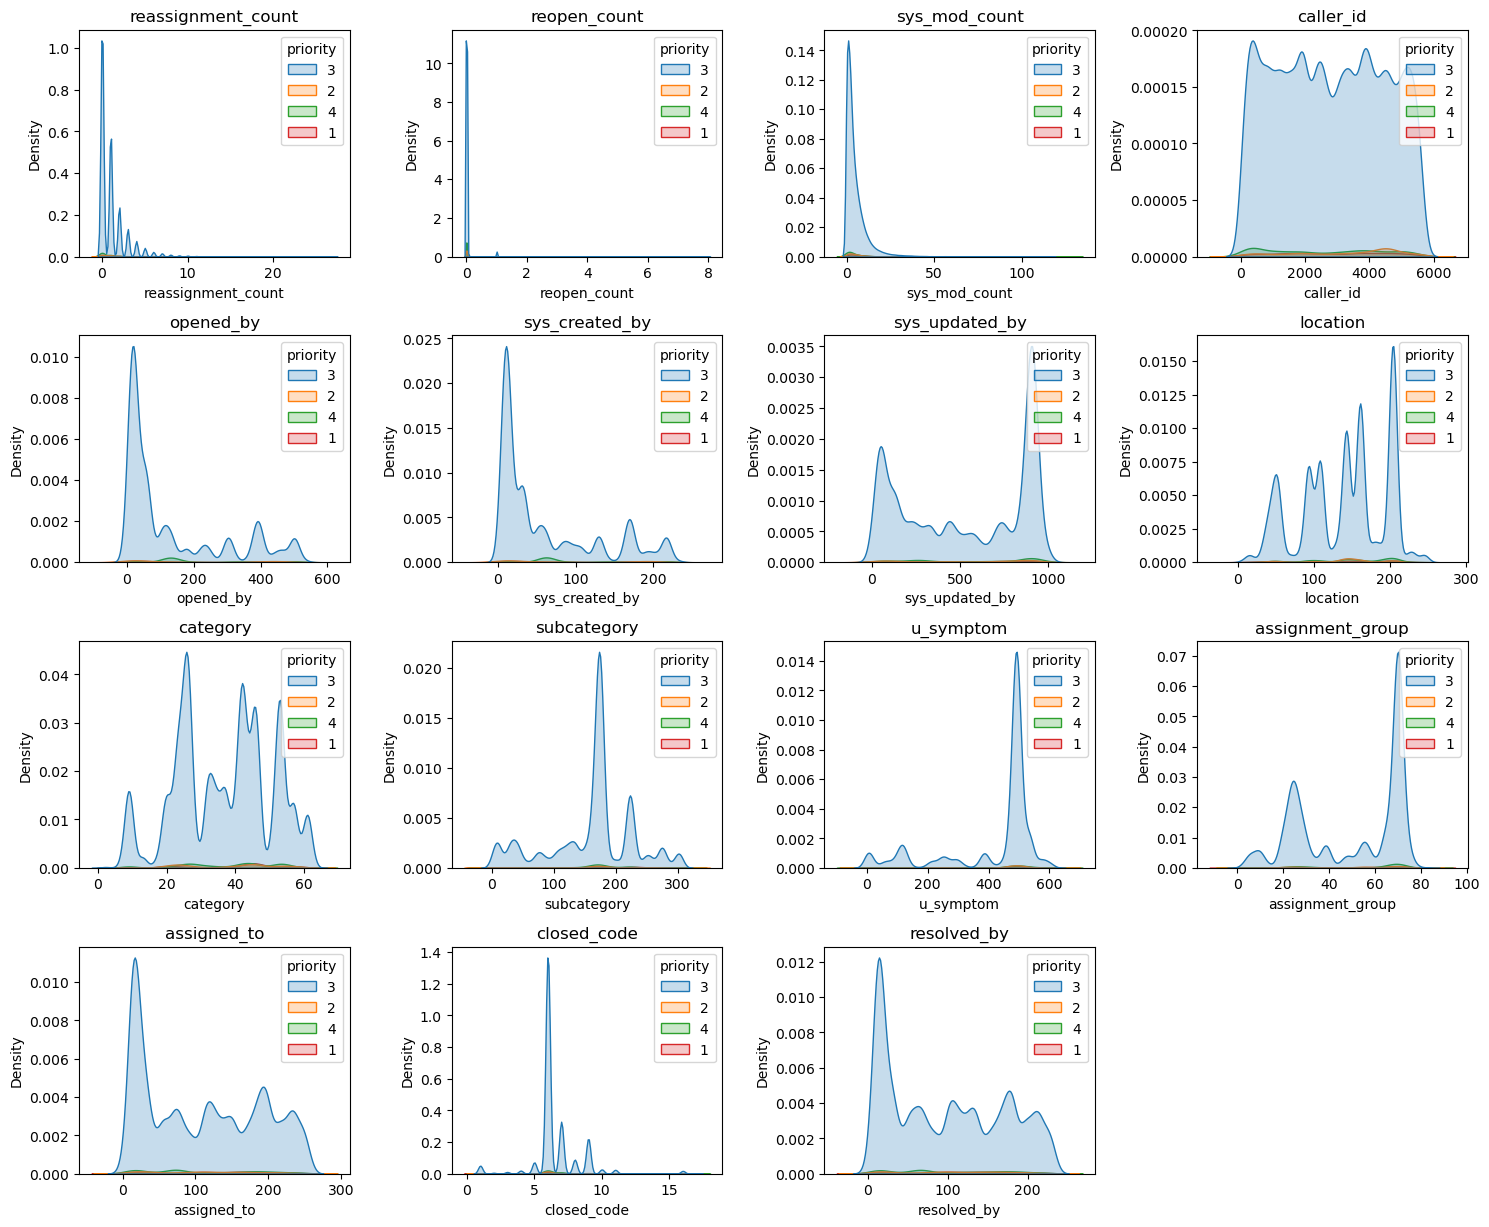

In [105]:
plt.figure(figsize=(15,15))
for ax, col in enumerate(df_num):
    plt.subplot(5,4, ax+1)
    plt.title(col)
    sns.kdeplot(x=df[col],shade=True, hue=df["priority"],color='red')
    

plt.tight_layout()

In [106]:
## visualising categorical variables
df_cat=df.select_dtypes('object')
df_cat

,number,incident_state,contact_type,priority,notify
0,INC0000045,New,Phone,3,Do Not Notify
1,INC0000045,Resolved,Phone,3,Do Not Notify
2,INC0000045,Resolved,Phone,3,Do Not Notify
3,INC0000045,Closed,Phone,3,Do Not Notify
4,INC0000047,New,Phone,3,Do Not Notify
...,...,...,...,...,...
141707,INC0120835,Closed,Email,3,Do Not Notify
141708,INC0121064,Active,Email,3,Do Not Notify
141709,INC0121064,Active,Email,3,Do Not Notify
141710,INC0121064,Resolved,Email,3,Do Not Notify


<Axes: xlabel='priority', ylabel='count'>

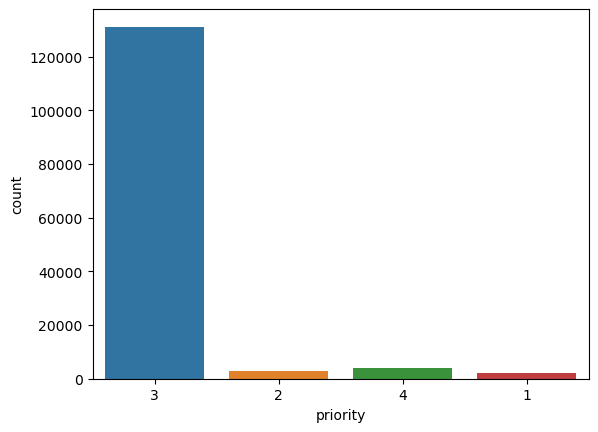

In [107]:
sns.countplot(x=df.priority)

In [108]:
df.priority.value_counts()
#priority
#3 - Moderate    
#4 - Low           
#2 - High          
#1 - Critical      

3    131173
4      3996
2      2896
1      2232
Name: priority, dtype: int64

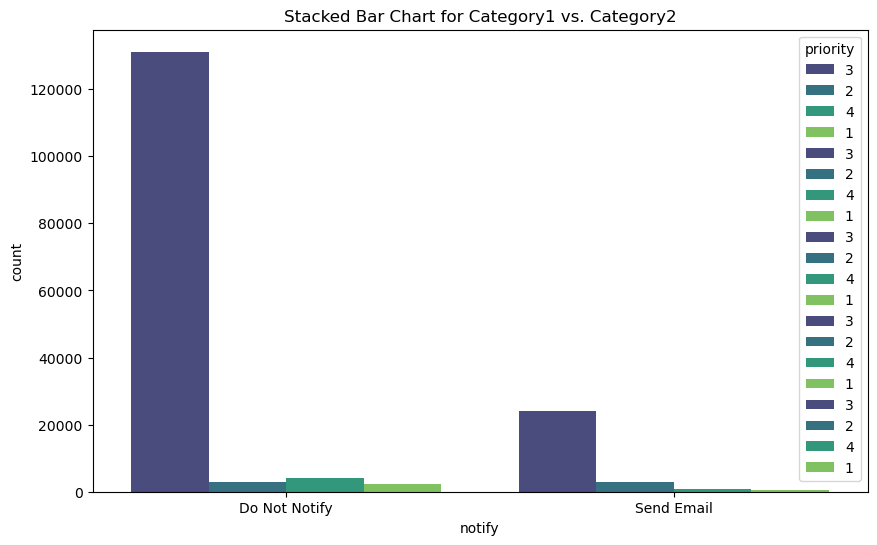

In [109]:
# Example with Seaborn
plt.figure(figsize=(10, 6))
for i in df_cat.columns:
    
    sns.countplot(x=df[i], hue='priority', data=df, palette='viridis')
plt.title('Stacked Bar Chart for Category1 vs. Category2')
plt.show()


In [110]:
### This particular countplot shows the distribution of categorical variables are also distributed 
# the most on moderate priority and less on others

#### heatmap to check numeric variables corr with target

In [111]:
dfnum=df.select_dtypes('number')
dfnum

,reassignment_count,reopen_count,sys_mod_count,caller_id,opened_by,sys_created_by,sys_updated_by,location,category,subcategory,u_symptom,assignment_group,assigned_to,closed_code,resolved_by
0,0,0,0,2403,8.0,6.0,21,143,55,170,72.0,56.0,166.0,5,149.0
1,0,0,2,2403,8.0,6.0,642,143,55,170,72.0,56.0,166.0,5,149.0
2,0,0,3,2403,8.0,6.0,804,143,55,170,72.0,56.0,166.0,5,149.0
3,0,0,4,2403,8.0,6.0,908,143,55,170,72.0,56.0,166.0,5,149.0
4,0,0,0,2403,397.0,171.0,746,165,40,215,471.0,70.0,89.0,5,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,1,0,4,116,12.0,7.0,27,204,42,223,494.0,31.0,10.0,9,9.0
141708,0,0,0,116,12.0,7.0,908,204,42,223,494.0,70.0,10.0,6,9.0
141709,1,0,1,116,12.0,7.0,60,204,42,223,494.0,31.0,10.0,6,9.0
141710,1,0,2,116,12.0,7.0,27,204,42,223,494.0,31.0,10.0,6,9.0


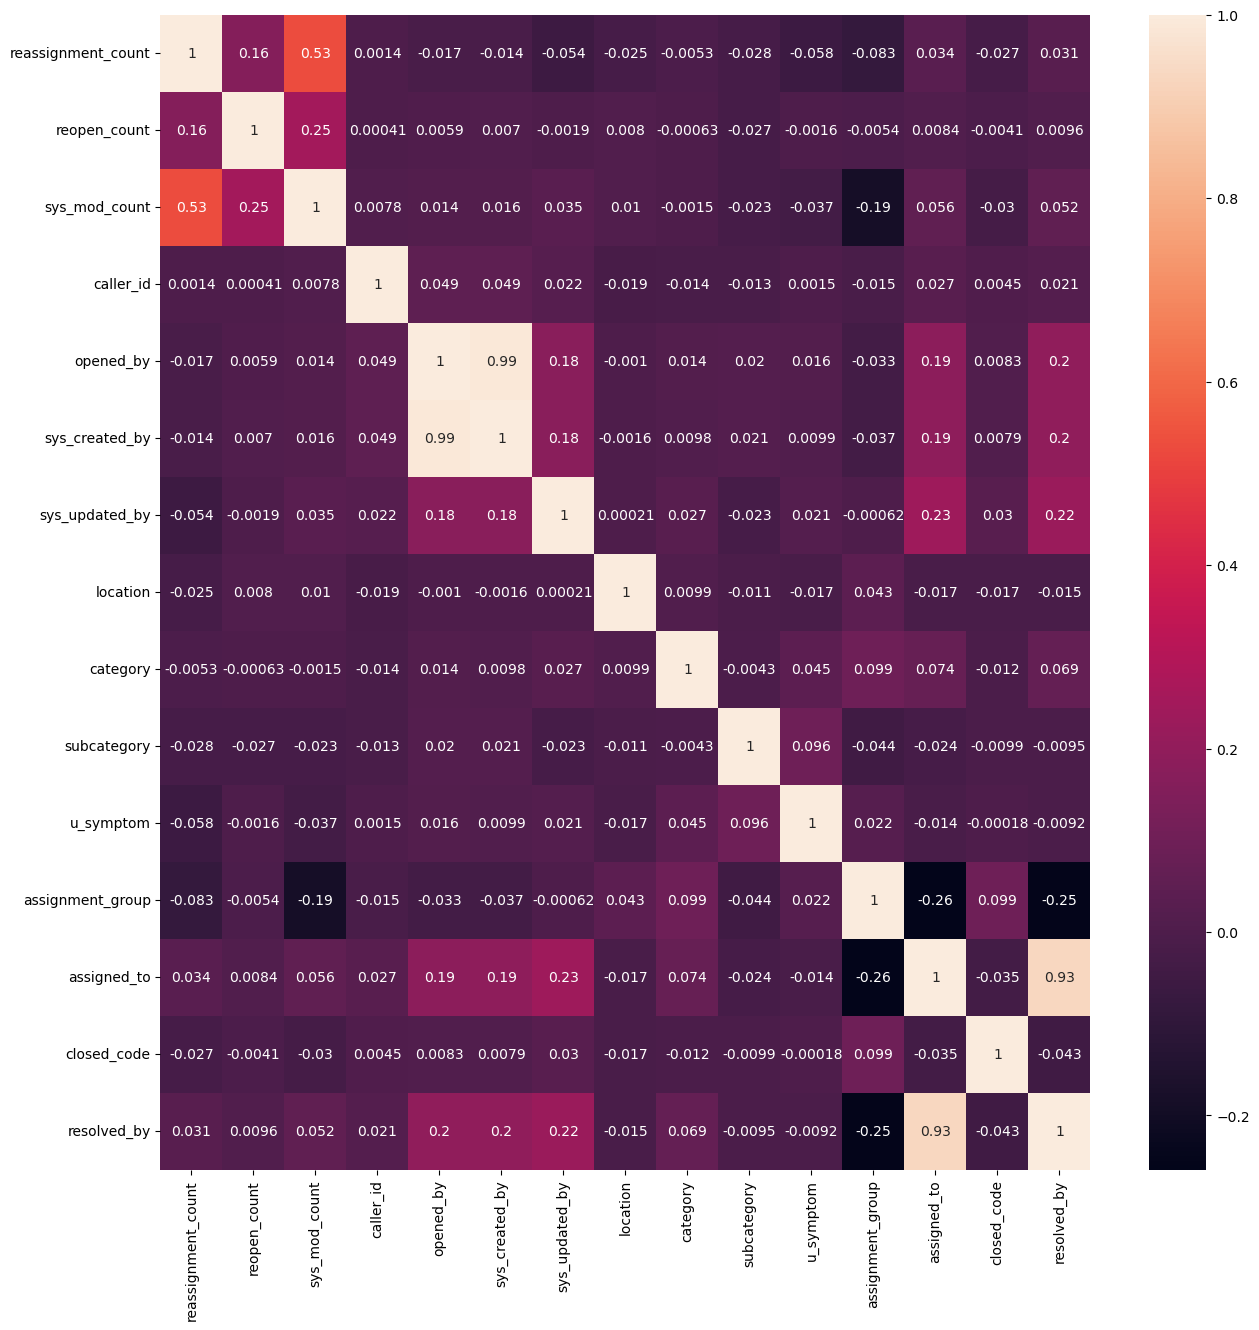

In [112]:
plt.figure(figsize=(15,15))
sns.heatmap(dfnum.corr(),annot=True)
plt.show()

In [113]:
df.select_dtypes('number').skew()

reassignment_count     3.112705
reopen_count          15.563855
sys_mod_count          4.746023
caller_id              0.013298
opened_by              1.134913
sys_created_by         1.076968
sys_updated_by        -0.176244
location              -0.325986
category              -0.188584
subcategory           -0.505780
u_symptom             -1.487601
assignment_group      -0.465787
assigned_to            0.226139
closed_code            1.244705
resolved_by            0.242004
dtype: float64

In [114]:
## columns like assigned to and reolved by have high correlation
# these columns are indicating that when a issues has not been resolved by first pickup they assign to different person and that
# person reolved so they are correlatd

In [115]:
df.select_dtypes('number').kurtosis()

reassignment_count     16.559681
reopen_count          343.986808
sys_mod_count          35.396531
caller_id              -1.226886
opened_by              -0.190374
sys_created_by         -0.237664
sys_updated_by         -1.620923
location               -0.921432
category               -0.823560
subcategory             0.021391
u_symptom               0.802967
assignment_group       -1.408012
assigned_to            -1.360225
closed_code             9.023640
resolved_by            -1.327368
dtype: float64

<Figure size 2500x2500 with 0 Axes>

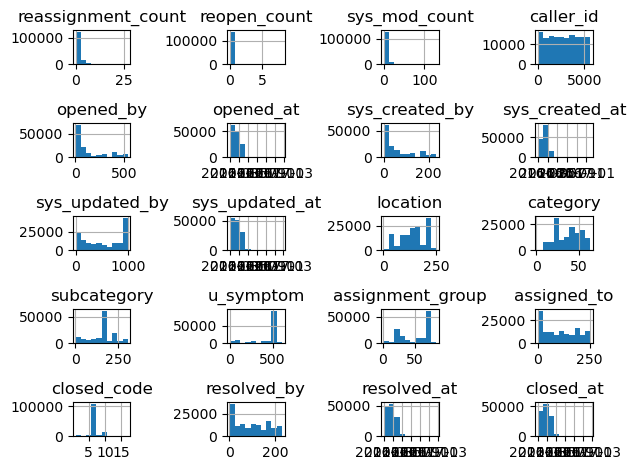

In [116]:
plt.figure(figsize=(25, 25))
df.drop(['priority', 'number'], axis=1).hist()
plt.tight_layout()
plt.show()

# Test 1.
* The variables has been cleaned with a pattern so that they look numeric but still in objective datatype
* The variables which are objective has been selected to check importance of variable with a statistical test to find oit
* the siginificant imporatnce of the variable with respect to target (priority)

In [117]:
from scipy.stats import chi2_contingency

# Chi-square Test of Independence
Let's examine the relationship of variables with the dependent variable with the chi-square test:

**H0: There is  no significant relationship between two variables,ie independent**



**H1: There is a  significant relationship between two variables,ie dependent**

In [118]:
df_cat=df.select_dtypes('object')
df_cat

,number,incident_state,contact_type,priority,notify
0,INC0000045,New,Phone,3,Do Not Notify
1,INC0000045,Resolved,Phone,3,Do Not Notify
2,INC0000045,Resolved,Phone,3,Do Not Notify
3,INC0000045,Closed,Phone,3,Do Not Notify
4,INC0000047,New,Phone,3,Do Not Notify
...,...,...,...,...,...
141707,INC0120835,Closed,Email,3,Do Not Notify
141708,INC0121064,Active,Email,3,Do Not Notify
141709,INC0121064,Active,Email,3,Do Not Notify
141710,INC0121064,Resolved,Email,3,Do Not Notify


In [119]:
insig_features=[]
for i in df_cat.columns:
    contingency_table=pd.crosstab(df_cat[i], df['priority'])
    
    chi2, p, dof, expected=chi2_contingency(contingency_table)
    print(f"Chi-square_result {i}:")
    print(f"Chi-square_statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degree_of_freedom: {dof}")
    print('.'*15)
    if p!=0.0 :insig_features.append(i)

Chi-square_result number:
Chi-square_statistic: 374955.4779734049
P-value: 0.0
Degree_of_freedom: 74073
...............
Chi-square_result incident_state:
Chi-square_statistic: 423.1368364227288
P-value: 4.7360131659149216e-83
Degree_of_freedom: 12
...............
Chi-square_result contact_type:
Chi-square_statistic: 74.20798471941745
P-value: 2.264825303289137e-12
Degree_of_freedom: 9
...............
Chi-square_result priority:
Chi-square_statistic: 420891.0
P-value: 0.0
Degree_of_freedom: 9
...............
Chi-square_result notify:
Chi-square_statistic: 5.985570830309558
P-value: 0.11231434975225893
Degree_of_freedom: 3
...............


In [120]:
insig_features

['incident_state', 'contact_type', 'notify']

# Test 2


In [121]:
from scipy.stats import f_oneway

In [122]:
numeric_columns = df.select_dtypes(include='number').columns
outcome_categories = df['priority'].unique()
alpha = 0.05  



In [123]:
# Dictionary to store p-values for each feature
p_values = {}

for feature in numeric_columns:
    # p-values for each category
    p_values[feature] = []

    for category in outcome_categories:
        subset = df[df['priority'] == category][feature]
        _, p_value = f_oneway(subset, df[df['priority'] != category][feature])
        p_values[feature].append(p_value)

# Create a DataFrame to display p-values
p_values_df = pd.DataFrame(p_values, index=outcome_categories)

# Identify features with p-values below the significance level
insignificant_features = p_values_df.columns[p_values_df.max() >= alpha]

# Display the results
print("Features sorted by p-value")
print(p_values_df)
print("\n Insignificant features")
print(insignificant_features)


Features sorted by p-value
   reassignment_count  reopen_count  sys_mod_count     caller_id  \
3        3.478306e-16  4.177993e-11   1.898001e-32  1.135284e-04   
2        3.120610e-36  1.565488e-01   2.297512e-10  5.027188e-49   
4        2.100670e-01  1.768957e-06   2.337561e-06  6.418787e-17   
1        5.443039e-04  4.672464e-07   4.662340e-23  4.564292e-02   

       opened_by  sys_created_by  sys_updated_by      location      category  \
3  2.172067e-245   1.795710e-254    9.012417e-02  4.169626e-03  1.395261e-23   
2   1.031298e-76    1.397975e-77    3.341592e-02  3.821241e-02  8.846697e-04   
4  1.602276e-113   8.085183e-117    4.991298e-08  3.405366e-22  3.266552e-01   
1   9.075110e-49    4.985721e-53    1.361112e-01  1.082532e-06  1.461710e-48   

    subcategory     u_symptom  assignment_group   assigned_to   closed_code  \
3  1.622421e-02  2.215072e-11      2.825341e-01  1.847166e-08  8.969236e-10   
2  3.658880e-11  2.826632e-01      1.153608e-05  2.209696e-01  1.895364e-

In [124]:
# Based on both test we can consider the insignificant varaibles show less influence on traget varaiables,
# we can drop them but this test doesnot entirely conclide the variables are necesserly be dropped at the moment.


In [125]:
df_features=df.drop(['reassignment_count', 'reopen_count', 'sys_updated_by', 'category',
       'u_symptom', 'assignment_group', 'assigned_to', 'closed_code',
       'resolved_by','incident_state', 'contact_type', 'notify'],axis=1)


### checking for outliers

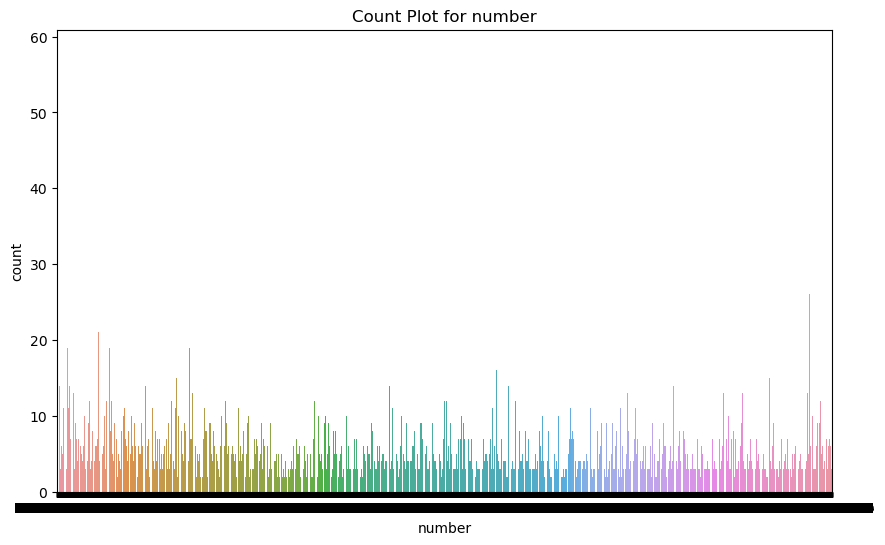

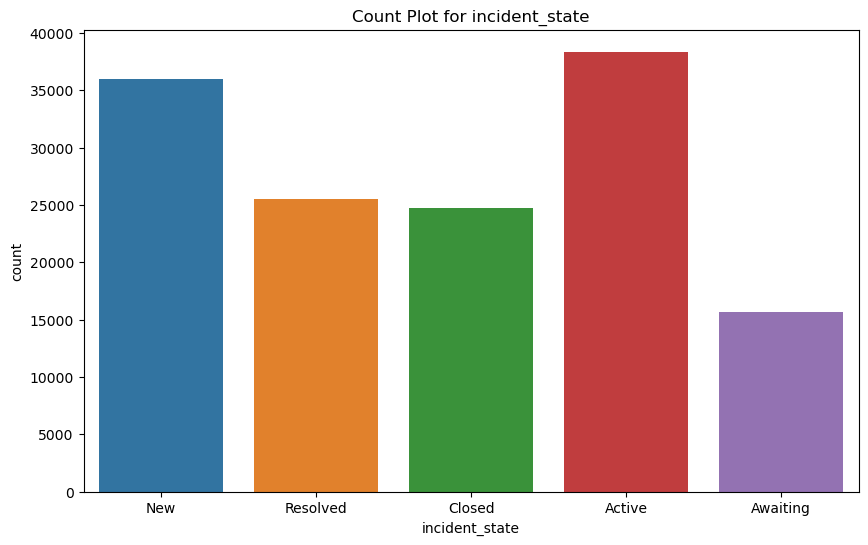

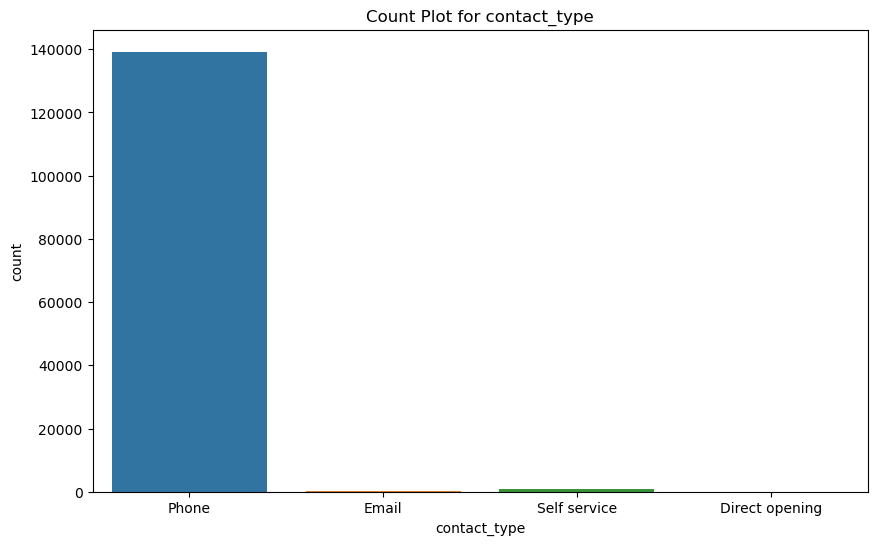

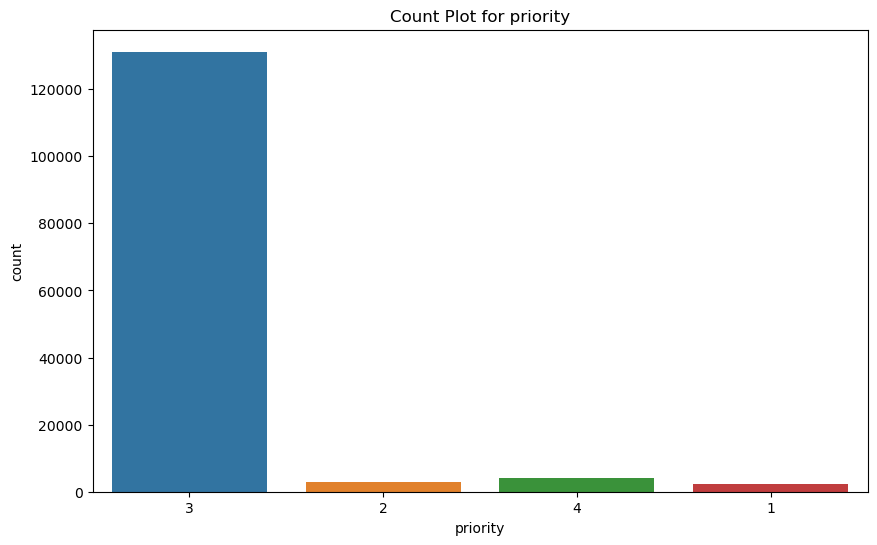

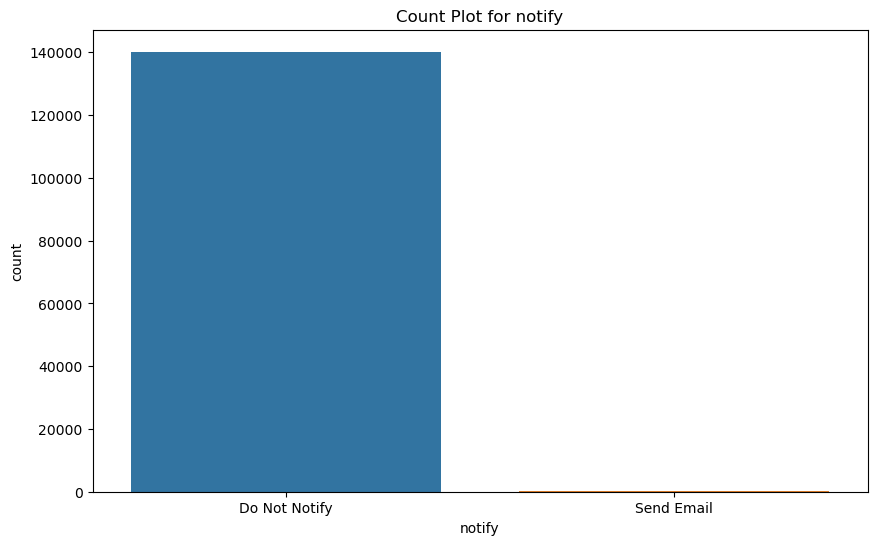

In [126]:
categorical_columns = df.select_dtypes(include='object').columns

# Count plot for each categorical variable
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot for {col}')
    plt.show()

In [127]:
df_number=df.select_dtypes('number')
df_number

,reassignment_count,reopen_count,sys_mod_count,caller_id,opened_by,sys_created_by,sys_updated_by,location,category,subcategory,u_symptom,assignment_group,assigned_to,closed_code,resolved_by
0,0,0,0,2403,8.0,6.0,21,143,55,170,72.0,56.0,166.0,5,149.0
1,0,0,2,2403,8.0,6.0,642,143,55,170,72.0,56.0,166.0,5,149.0
2,0,0,3,2403,8.0,6.0,804,143,55,170,72.0,56.0,166.0,5,149.0
3,0,0,4,2403,8.0,6.0,908,143,55,170,72.0,56.0,166.0,5,149.0
4,0,0,0,2403,397.0,171.0,746,165,40,215,471.0,70.0,89.0,5,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,1,0,4,116,12.0,7.0,27,204,42,223,494.0,31.0,10.0,9,9.0
141708,0,0,0,116,12.0,7.0,908,204,42,223,494.0,70.0,10.0,6,9.0
141709,1,0,1,116,12.0,7.0,60,204,42,223,494.0,31.0,10.0,6,9.0
141710,1,0,2,116,12.0,7.0,27,204,42,223,494.0,31.0,10.0,6,9.0


In [128]:

Q1 = df_number.quantile(0.25)
Q3 = df_number.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df_number[(df_number >= lower_bound) & (df_number <= upper_bound)]


In [129]:
df_no_outliers.count()

reassignment_count    120836
reopen_count          137999
sys_mod_count         129487
caller_id             140297
opened_by             140297
sys_created_by        140297
sys_updated_by        140297
location              140297
category              140297
subcategory           114386
u_symptom             118112
assignment_group      140297
assigned_to           140297
closed_code           116932
resolved_by           140297
dtype: int64

In [130]:
### There is presence of outliers in these specific columns....

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140297 entries, 0 to 141711
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   140297 non-null  object        
 1   incident_state           140297 non-null  object        
 2   active                   140297 non-null  bool          
 3   reassignment_count       140297 non-null  int64         
 4   reopen_count             140297 non-null  int64         
 5   sys_mod_count            140297 non-null  int64         
 6   made_sla                 140297 non-null  bool          
 7   caller_id                140297 non-null  int32         
 8   opened_by                140297 non-null  float64       
 9   opened_at                140297 non-null  datetime64[ns]
 10  sys_created_by           140297 non-null  float64       
 11  sys_created_at           140297 non-null  datetime64[ns]
 12  sys_updated_by  

#### Encoding

In [132]:
from sklearn.preprocessing import LabelEncoder

In [133]:
df_features.select_dtypes('object')

,number,priority
0,INC0000045,3
1,INC0000045,3
2,INC0000045,3
3,INC0000045,3
4,INC0000047,3
...,...,...
141707,INC0120835,3
141708,INC0121064,3
141709,INC0121064,3
141710,INC0121064,3


In [134]:

label_encoder = LabelEncoder()

# Fit and transform the categorical column
df_features['number'] = label_encoder.fit_transform(df_features['number'])

df_features

,number,active,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_at,location,subcategory,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
0,0,True,0,True,2403,8.0,2016-02-29 01:16:00,6.0,2016-02-29 01:23:00.000000000,2016-02-29 01:23:00,143,170,3,True,False,2016-02-29 11:29:00,2016-03-05 12:00:00
1,0,True,2,True,2403,8.0,2016-02-29 01:16:00,6.0,2016-02-29 01:23:00.000000000,2016-02-29 08:53:00,143,170,3,True,False,2016-02-29 11:29:00,2016-03-05 12:00:00
2,0,True,3,True,2403,8.0,2016-02-29 01:16:00,6.0,2016-02-29 01:23:00.000000000,2016-02-29 11:29:00,143,170,3,True,False,2016-02-29 11:29:00,2016-03-05 12:00:00
3,0,False,4,True,2403,8.0,2016-02-29 01:16:00,6.0,2016-02-29 01:23:00.000000000,2016-03-05 12:00:00,143,170,3,True,False,2016-02-29 11:29:00,2016-03-05 12:00:00
4,1,True,0,True,2403,397.0,2016-02-29 04:40:00,171.0,2016-02-29 04:57:00.000000000,2016-02-29 04:57:00,165,215,3,True,False,2016-03-01 09:52:00,2016-03-06 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,24690,False,4,True,116,12.0,2017-02-16 09:09:00,7.0,2016-04-08 16:18:22.187496704,2017-02-16 09:53:00,204,223,3,False,True,2017-02-16 09:53:00,2017-02-16 09:53:00
141708,24691,True,0,True,116,12.0,2017-02-16 14:17:00,7.0,2016-04-08 16:18:22.187496704,2017-02-16 14:17:00,204,223,3,False,False,2017-02-16 16:38:00,2017-02-16 16:38:00
141709,24691,True,1,True,116,12.0,2017-02-16 14:17:00,7.0,2016-04-08 16:18:22.187496704,2017-02-16 15:20:00,204,223,3,False,False,2017-02-16 16:38:00,2017-02-16 16:38:00
141710,24691,True,2,True,116,12.0,2017-02-16 14:17:00,7.0,2016-04-08 16:18:22.187496704,2017-02-16 16:38:00,204,223,3,False,True,2017-02-16 16:38:00,2017-02-16 16:38:00


In [135]:

label_encoder = LabelEncoder()

# Fit and transform the categorical column
df_features['priority'] = label_encoder.fit_transform(df_features['priority'])

df_features

,number,active,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_at,location,subcategory,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
0,0,True,0,True,2403,8.0,2016-02-29 01:16:00,6.0,2016-02-29 01:23:00.000000000,2016-02-29 01:23:00,143,170,2,True,False,2016-02-29 11:29:00,2016-03-05 12:00:00
1,0,True,2,True,2403,8.0,2016-02-29 01:16:00,6.0,2016-02-29 01:23:00.000000000,2016-02-29 08:53:00,143,170,2,True,False,2016-02-29 11:29:00,2016-03-05 12:00:00
2,0,True,3,True,2403,8.0,2016-02-29 01:16:00,6.0,2016-02-29 01:23:00.000000000,2016-02-29 11:29:00,143,170,2,True,False,2016-02-29 11:29:00,2016-03-05 12:00:00
3,0,False,4,True,2403,8.0,2016-02-29 01:16:00,6.0,2016-02-29 01:23:00.000000000,2016-03-05 12:00:00,143,170,2,True,False,2016-02-29 11:29:00,2016-03-05 12:00:00
4,1,True,0,True,2403,397.0,2016-02-29 04:40:00,171.0,2016-02-29 04:57:00.000000000,2016-02-29 04:57:00,165,215,2,True,False,2016-03-01 09:52:00,2016-03-06 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,24690,False,4,True,116,12.0,2017-02-16 09:09:00,7.0,2016-04-08 16:18:22.187496704,2017-02-16 09:53:00,204,223,2,False,True,2017-02-16 09:53:00,2017-02-16 09:53:00
141708,24691,True,0,True,116,12.0,2017-02-16 14:17:00,7.0,2016-04-08 16:18:22.187496704,2017-02-16 14:17:00,204,223,2,False,False,2017-02-16 16:38:00,2017-02-16 16:38:00
141709,24691,True,1,True,116,12.0,2017-02-16 14:17:00,7.0,2016-04-08 16:18:22.187496704,2017-02-16 15:20:00,204,223,2,False,False,2017-02-16 16:38:00,2017-02-16 16:38:00
141710,24691,True,2,True,116,12.0,2017-02-16 14:17:00,7.0,2016-04-08 16:18:22.187496704,2017-02-16 16:38:00,204,223,2,False,True,2017-02-16 16:38:00,2017-02-16 16:38:00


In [136]:
df_features.columns

Index(['number', 'active', 'sys_mod_count', 'made_sla', 'caller_id',
       'opened_by', 'opened_at', 'sys_created_by', 'sys_created_at',
       'sys_updated_at', 'location', 'subcategory', 'priority', 'knowledge',
       'u_priority_confirmation', 'resolved_at', 'closed_at'],
      dtype='object')

In [137]:
datetime_columns = ['opened_at', 'sys_created_at', 'resolved_at', 'closed_at', 'sys_updated_at']

# Find the oldest date in the dataset
oldest_date = df_features[datetime_columns].min().min()

# Convert datetime columns to numeric features
for col in datetime_columns:
    df_features[col] = (pd.to_datetime(df_features[col], errors='coerce') - oldest_date).dt.days

In [138]:
df_features[['opened_at', 'sys_created_at', 'resolved_at', 'closed_at', 'sys_updated_at']]

,opened_at,sys_created_at,resolved_at,closed_at,sys_updated_at
0,0,0,0,5,0
1,0,0,0,5,0
2,0,0,0,5,0
3,0,0,0,5,5
4,0,0,1,6,0
...,...,...,...,...,...
141707,353,39,353,353,353
141708,353,39,353,353,353
141709,353,39,353,353,353
141710,353,39,353,353,353


In [139]:
# List of boolean columns converting into numeric
boolean_columns = ['knowledge', 'u_priority_confirmation','made_sla']
df_features[boolean_columns] = df_features[boolean_columns].astype(int)

In [140]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140297 entries, 0 to 141711
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   number                   140297 non-null  int32  
 1   active                   140297 non-null  bool   
 2   sys_mod_count            140297 non-null  int64  
 3   made_sla                 140297 non-null  int32  
 4   caller_id                140297 non-null  int32  
 5   opened_by                140297 non-null  float64
 6   opened_at                140297 non-null  int64  
 7   sys_created_by           140297 non-null  float64
 8   sys_created_at           140297 non-null  int64  
 9   sys_updated_at           140297 non-null  int64  
 10  location                 140297 non-null  int32  
 11  subcategory              140297 non-null  int32  
 12  priority                 140297 non-null  int32  
 13  knowledge                140297 non-null  int32  
 14  u_pr

In [141]:
df_features.drop('active',axis=1,inplace=True)

In [142]:
# incident state already have information on active
df_features

,number,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_at,location,subcategory,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
0,0,0,1,2403,8.0,0,6.0,0,0,143,170,2,1,0,0,5
1,0,2,1,2403,8.0,0,6.0,0,0,143,170,2,1,0,0,5
2,0,3,1,2403,8.0,0,6.0,0,0,143,170,2,1,0,0,5
3,0,4,1,2403,8.0,0,6.0,0,5,143,170,2,1,0,0,5
4,1,0,1,2403,397.0,0,171.0,0,0,165,215,2,1,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,24690,4,1,116,12.0,353,7.0,39,353,204,223,2,0,1,353,353
141708,24691,0,1,116,12.0,353,7.0,39,353,204,223,2,0,0,353,353
141709,24691,1,1,116,12.0,353,7.0,39,353,204,223,2,0,0,353,353
141710,24691,2,1,116,12.0,353,7.0,39,353,204,223,2,0,1,353,353


### Transformation

In [143]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


In [144]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140297 entries, 0 to 141711
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   number                   140297 non-null  int32  
 1   sys_mod_count            140297 non-null  int64  
 2   made_sla                 140297 non-null  int32  
 3   caller_id                140297 non-null  int32  
 4   opened_by                140297 non-null  float64
 5   opened_at                140297 non-null  int64  
 6   sys_created_by           140297 non-null  float64
 7   sys_created_at           140297 non-null  int64  
 8   sys_updated_at           140297 non-null  int64  
 9   location                 140297 non-null  int32  
 10  subcategory              140297 non-null  int32  
 11  priority                 140297 non-null  int32  
 12  knowledge                140297 non-null  int32  
 13  u_priority_confirmation  140297 non-null  int32  
 14  reso

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140297 entries, 0 to 141711
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   140297 non-null  object        
 1   incident_state           140297 non-null  object        
 2   active                   140297 non-null  bool          
 3   reassignment_count       140297 non-null  int64         
 4   reopen_count             140297 non-null  int64         
 5   sys_mod_count            140297 non-null  int64         
 6   made_sla                 140297 non-null  bool          
 7   caller_id                140297 non-null  int32         
 8   opened_by                140297 non-null  float64       
 9   opened_at                140297 non-null  datetime64[ns]
 10  sys_created_by           140297 non-null  float64       
 11  sys_created_at           140297 non-null  datetime64[ns]
 12  sys_updated_by  

In [146]:
X=df_features.drop('priority',axis=1)
y=df_features['priority']

In [147]:

# Min-Max scaling
scaler = MinMaxScaler()

scaled_data = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
scaled_data.describe()

,number,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_at,location,subcategory,knowledge,u_priority_confirmation,resolved_at,closed_at
count,140297.000000,140297.000000,140297.000000,140297.000000,140297.000000,140297.000000,140297.000000,140297.000000,140297.000000,140297.000000,140297.000000,140297.000000,140297.000000,140297.000000,140297.000000
mean,0.469849,0.039424,0.935095,0.491234,0.252916,0.122051,0.268938,0.117540,0.139685,0.552666,0.522530,0.177930,0.289735,0.154135,0.169272
std,0.295352,0.059669,0.246359,0.290950,0.294879,0.101491,0.287082,0.083589,0.110988,0.225236,0.230369,0.382455,0.453641,0.123360,0.121460
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.202300,0.007752,1.000000,0.234574,0.027985,0.045326,0.038793,0.072072,0.067606,0.368421,0.429043,0.000000,0.000000,0.079320,0.087324
50%,0.453931,0.023256,1.000000,0.486879,0.104478,0.107649,0.137931,0.117117,0.123944,0.570850,0.567657,0.000000,0.000000,0.138810,0.143662
75%,0.728808,0.046512,1.000000,0.740426,0.442164,0.184136,0.426724,0.129129,0.197183,0.817814,0.617162,0.000000,1.000000,0.206799,0.219718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [148]:
# Robust scaling
scaler = RobustScaler()
robust_scaled_data = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
robust_scaled_data.describe()

,number,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_at,location,subcategory,knowledge,u_priority_confirmation,resolved_at,closed_at
count,140297.000000,140297.000000,140297.000000,140297.000000,140297.000000,140297.000000,140297.000000,140297.000000,140297.000000,140297.000000,140297.000000,140297.000000,140297.000000,140297.000000,140297.000000
mean,0.030234,0.417144,-0.064905,0.008609,0.358391,0.103757,0.337707,0.007407,0.121483,-0.040464,-0.239883,0.177930,0.289735,0.120211,0.193437
std,0.560963,1.539448,0.246359,0.575169,0.711960,0.731148,0.740033,1.465006,0.856536,0.501200,1.224591,0.382455,0.453641,0.967694,0.917409
min,-0.862154,-0.600000,-1.000000,-0.962496,-0.252252,-0.775510,-0.355556,-2.052632,-0.956522,-1.270270,-3.017544,0.000000,0.000000,-1.088889,-1.085106
25%,-0.477923,-0.400000,0.000000,-0.498773,-0.184685,-0.448980,-0.255556,-0.789474,-0.434783,-0.450450,-0.736842,0.000000,0.000000,-0.466667,-0.425532
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.522077,0.600000,0.000000,0.501227,0.815315,0.551020,0.744444,0.210526,0.565217,0.549550,0.263158,0.000000,1.000000,0.533333,0.574468
max,1.037154,25.200000,0.000000,1.014371,2.162162,6.428571,2.222222,15.473684,6.760870,0.954955,2.298246,1.000000,1.000000,6.755556,6.468085


### Train Test Split

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X=scaled_data
y=df_features['priority']

In [151]:
X_train_MM, X_test_MM, y_train_MM, y_test_MM = train_test_split(X,y,test_size=0.3,random_state=10)

In [152]:
X_train_MM.shape, X_test_MM.shape, y_train_MM.shape, y_test_MM.shape

((98207, 15), (42090, 15), (98207,), (42090,))

In [153]:
X_train_MM

,number,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_at,location,subcategory,knowledge,u_priority_confirmation,resolved_at,closed_at
69687,0.450731,0.000000,1.0,0.814362,0.111940,0.107649,0.137931,0.114114,0.107042,0.643725,0.567657,0.0,0.0,0.121813,0.135211
17161,0.097971,0.015504,1.0,0.943794,0.104478,0.019830,0.129310,0.021021,0.022535,0.817814,0.570957,1.0,0.0,0.048159,0.067606
100564,0.691750,0.000000,1.0,0.403723,0.011194,0.175637,0.021552,0.117117,0.174648,0.570850,0.554455,0.0,0.0,0.178470,0.191549
100888,0.694788,0.007752,1.0,0.860638,0.027985,0.178470,0.038793,0.117117,0.177465,0.817814,0.729373,0.0,0.0,0.178470,0.191549
10735,0.062735,0.038760,1.0,0.979787,0.408582,0.011331,0.418103,0.012012,0.011268,0.368421,0.749175,1.0,0.0,0.028329,0.067606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,0.054878,0.085271,0.0,0.151773,0.011194,0.011331,0.021552,0.012012,0.067606,0.643725,0.438944,1.0,0.0,0.019830,0.067606
105595,0.731238,0.000000,1.0,0.080319,0.027985,0.184136,0.038793,0.195195,0.183099,0.157895,0.729373,0.0,0.0,0.184136,0.197183
93553,0.634685,0.031008,1.0,0.560461,0.557836,0.161473,0.551724,0.171171,0.163380,0.165992,0.438944,0.0,0.0,0.184136,0.197183
94735,0.644486,0.015504,1.0,0.047340,0.111940,0.164306,0.137931,0.174174,0.163380,0.429150,0.567657,0.0,1.0,0.164306,0.177465


### Base Models

In [154]:
def print_metrics(y_test, y_pred, model_name):
    print("Metrics for model ", model_name)
    print('')
    print('Accuracy =', accuracy_score(y_test, y_pred))
    print('')
    print('Recall =', recall_score(y_test, y_pred,average='weighted'))
    print('')
    print('Precision =', precision_score(y_test, y_pred,average='weighted'))
    print('')
    print('F1 Score =', f1_score(y_test, y_pred,average='weighted'))
    print('')
    print(confusion_matrix(y_test, y_pred))
    print('')
    print(classification_report(y_test, y_pred))

In [155]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [156]:
# try out a KNN model
knn=KNeighborsClassifier()
knn.fit(X_train_MM, y_train_MM)
y_pred_knn=knn.predict(X_test_MM)
print_metrics(y_test_MM, y_pred_knn, "knn")

Metrics for model  knn

Accuracy = 0.9588025659301497

Recall = 0.9588025659301497

Precision = 0.9551077145262364

F1 Score = 0.9562457603786615

[[  295    14   369     7]
 [   19   538   326     7]
 [  171   168 38744   186]
 [   12     9   446   779]]

              precision    recall  f1-score   support

           0       0.59      0.43      0.50       685
           1       0.74      0.60      0.66       890
           2       0.97      0.99      0.98     39269
           3       0.80      0.63      0.70      1246

    accuracy                           0.96     42090
   macro avg       0.77      0.66      0.71     42090
weighted avg       0.96      0.96      0.96     42090



In [157]:
report_knn = classification_report(y_train_MM, knn.predict(X_train_MM))
report_knn

'              precision    recall  f1-score   support\n\n           0       0.78      0.65      0.71      1547\n           1       0.84      0.69      0.76      2006\n           2       0.98      0.99      0.99     91904\n           3       0.90      0.74      0.81      2750\n\n    accuracy                           0.97     98207\n   macro avg       0.88      0.77      0.82     98207\nweighted avg       0.97      0.97      0.97     98207\n'

In [158]:
lr_model = LogisticRegression()
lr_model.fit(X_train_MM, y_train_MM)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_MM)

print_metrics(y_test_MM, y_pred_lr, "lr_model")


Metrics for model  lr_model

Accuracy = 0.9328581610833927

Recall = 0.9328581610833927

Precision = 0.8704385678408874

F1 Score = 0.9005680637112802

[[    0     0   685     0]
 [    0     0   890     0]
 [    0     5 39264     0]
 [    0     0  1246     0]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       685
           1       0.00      0.00      0.00       890
           2       0.93      1.00      0.97     39269
           3       0.00      0.00      0.00      1246

    accuracy                           0.93     42090
   macro avg       0.23      0.25      0.24     42090
weighted avg       0.87      0.93      0.90     42090



In [159]:
report_lr = classification_report(y_train_MM, lr_model.predict(X_train_MM))
report_lr

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00      1547\n           1       0.00      0.00      0.00      2006\n           2       0.94      1.00      0.97     91904\n           3       0.00      0.00      0.00      2750\n\n    accuracy                           0.94     98207\n   macro avg       0.23      0.25      0.24     98207\nweighted avg       0.88      0.94      0.90     98207\n'

In [160]:
# try out a randomforestclassifier model
rfc=RandomForestClassifier()
# fit the model using fit() on train data
rfc.fit(X_train_MM, y_train_MM)
y_pred_rfc=rfc.predict(X_test_MM)
print_metrics(y_test_MM, y_pred_rfc, "rfc")

Metrics for model  rfc

Accuracy = 0.9893561416013305

Recall = 0.9893561416013305

Precision = 0.9891057292384408

F1 Score = 0.9891293559220629

[[  573     9   102     1]
 [    4   749   136     1]
 [   40    45 39157    27]
 [    5     1    77  1163]]

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       685
           1       0.93      0.84      0.88       890
           2       0.99      1.00      0.99     39269
           3       0.98      0.93      0.95      1246

    accuracy                           0.99     42090
   macro avg       0.96      0.90      0.93     42090
weighted avg       0.99      0.99      0.99     42090



In [161]:

report_rf = classification_report(y_train_MM, rfc.predict(X_train_MM))
report_rf

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1547\n           1       1.00      1.00      1.00      2006\n           2       1.00      1.00      1.00     91904\n           3       1.00      1.00      1.00      2750\n\n    accuracy                           1.00     98207\n   macro avg       1.00      1.00      1.00     98207\nweighted avg       1.00      1.00      1.00     98207\n'

In [162]:
from sklearn.ensemble import GradientBoostingClassifier

In [163]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_MM, y_train_MM)
y_pred_gb=gb_model.predict(X_test_MM)
print_metrics(y_test_MM, y_pred_gb, "gb_model")

Metrics for model  gb_model

Accuracy = 0.9468044666191494

Recall = 0.9468044666191494

Precision = 0.9431871180740226

F1 Score = 0.9318509363853056

[[   88     1   592     4]
 [    0   183   705     2]
 [    9    31 39173    56]
 [    0     0   839   407]]

              precision    recall  f1-score   support

           0       0.91      0.13      0.23       685
           1       0.85      0.21      0.33       890
           2       0.95      1.00      0.97     39269
           3       0.87      0.33      0.47      1246

    accuracy                           0.95     42090
   macro avg       0.89      0.41      0.50     42090
weighted avg       0.94      0.95      0.93     42090



In [164]:
report_gb = classification_report(y_train_MM, gb_model.predict(X_train_MM))
print(report_gb)

              precision    recall  f1-score   support

           0       0.97      0.15      0.25      1547
           1       0.89      0.21      0.34      2006
           2       0.95      1.00      0.97     91904
           3       0.89      0.36      0.51      2750

    accuracy                           0.95     98207
   macro avg       0.92      0.43      0.52     98207
weighted avg       0.95      0.95      0.94     98207



In [165]:
from xgboost import XGBClassifier

In [166]:
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train_MM, y_train_MM)
y_pred_xgb=xgb_model.predict(X_test_MM)
print_metrics(y_test_MM, y_pred_xgb, "xgb_model")

Metrics for model  xgb_model

Accuracy = 0.941007365169874

Recall = 0.941007365169874

Precision = 0.9383817665527027

F1 Score = 0.9196383353526352

[[   18     0   667     0]
 [    0   123   767     0]
 [    2    30 39227    10]
 [    0     0  1007   239]]

              precision    recall  f1-score   support

           0       0.90      0.03      0.05       685
           1       0.80      0.14      0.24       890
           2       0.94      1.00      0.97     39269
           3       0.96      0.19      0.32      1246

    accuracy                           0.94     42090
   macro avg       0.90      0.34      0.39     42090
weighted avg       0.94      0.94      0.92     42090



In [167]:
report_xgb = classification_report(y_train_MM, xgb_model.predict(X_train_MM))
print(report_xgb)

              precision    recall  f1-score   support

           0       0.94      0.03      0.06      1547
           1       0.83      0.13      0.22      2006
           2       0.94      1.00      0.97     91904
           3       0.98      0.20      0.33      2750

    accuracy                           0.94     98207
   macro avg       0.92      0.34      0.40     98207
weighted avg       0.94      0.94      0.92     98207



In [168]:
# the base model perfromance looks verymuch biased towards the moderate class,
# considering the imbalance in data,
# even though the accuracy score and f1scores look good, the precesion and recall looks very bad
# and this should be furuther developed with different methods.

In [169]:
# even though the model has perfromed equally well in both test and train, it still shows favour to one particular class, 


#  Main model

In [155]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

In [173]:
# Create a synthetic dataset
X = scaled_data
y = df_features['priority']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((98207, 15), (42090, 15), (98207,), (42090,))

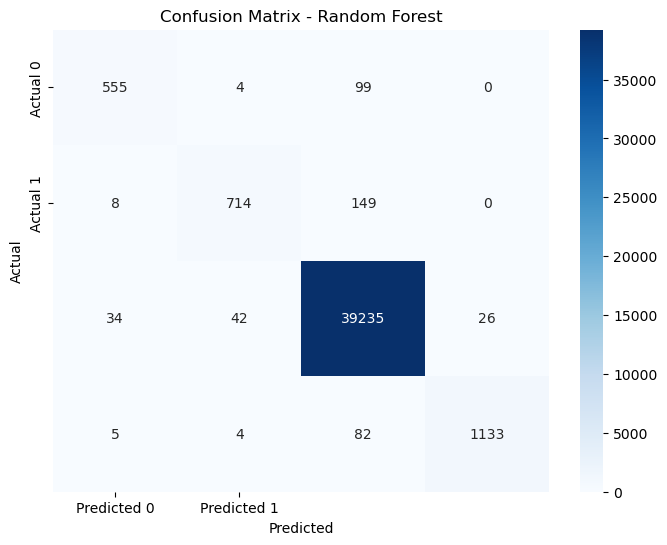

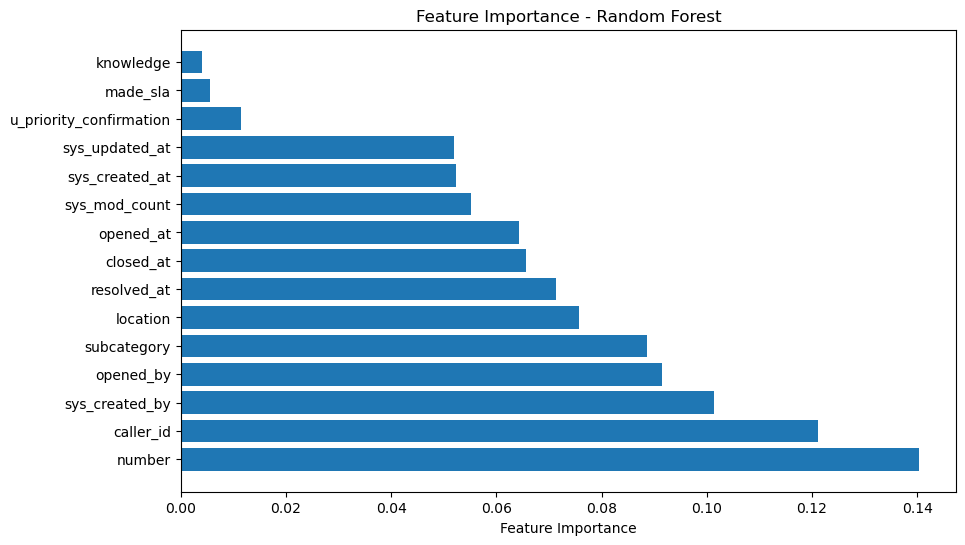

Model: Random Forest
Accuracy: 0.9892373485388454
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       658
           1       0.93      0.82      0.87       871
           2       0.99      1.00      0.99     39337
           3       0.98      0.93      0.95      1224

    accuracy                           0.99     42090
   macro avg       0.96      0.90      0.92     42090
weighted avg       0.99      0.99      0.99     42090



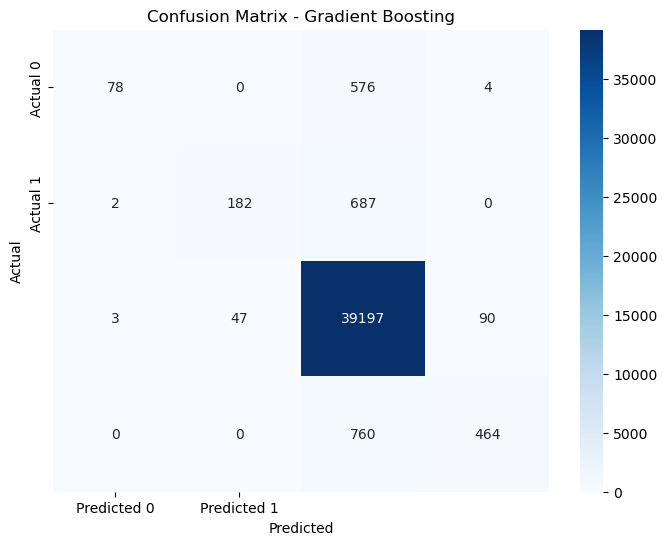

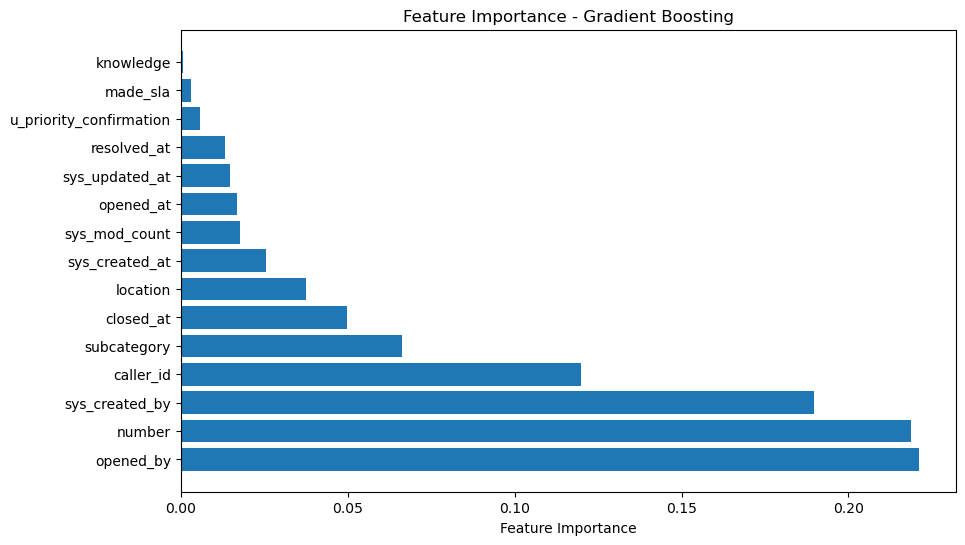

Model: Gradient Boosting
Accuracy: 0.9484675694939415
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.12      0.21       658
           1       0.79      0.21      0.33       871
           2       0.95      1.00      0.97     39337
           3       0.83      0.38      0.52      1224

    accuracy                           0.95     42090
   macro avg       0.88      0.43      0.51     42090
weighted avg       0.94      0.95      0.93     42090



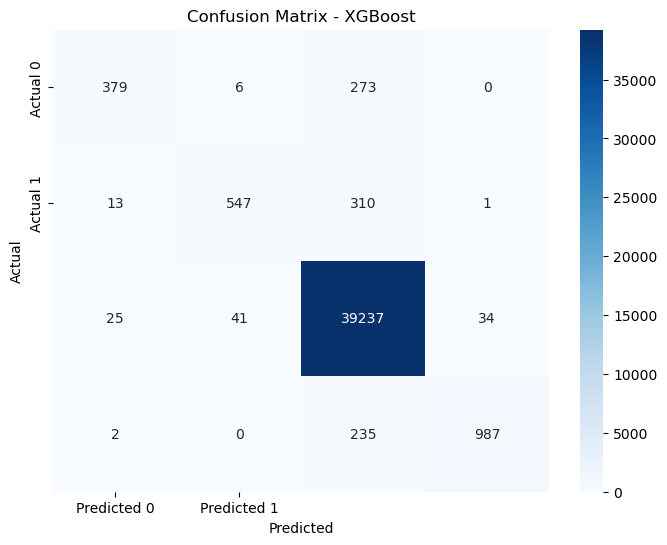

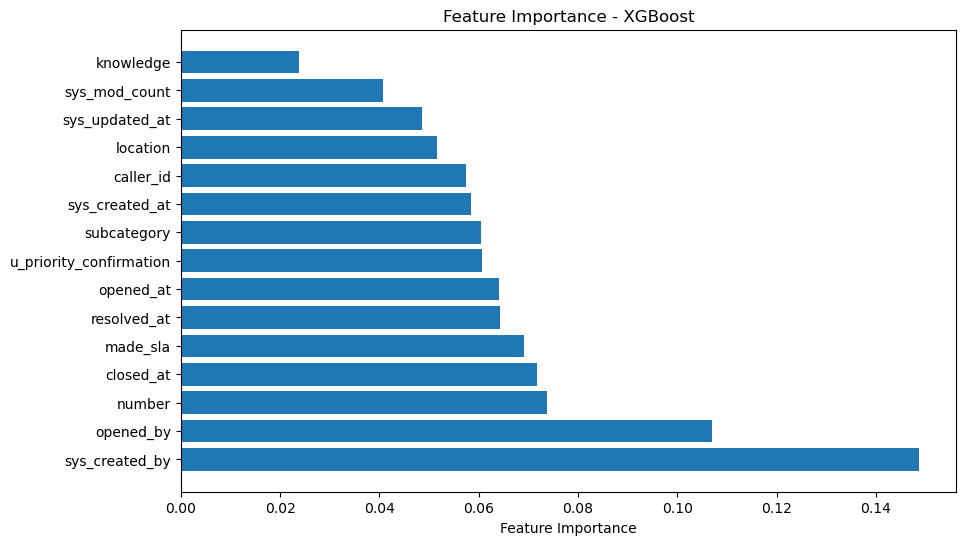

Model: XGBoost
Accuracy: 0.9776669042527917
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.58      0.70       658
           1       0.92      0.63      0.75       871
           2       0.98      1.00      0.99     39337
           3       0.97      0.81      0.88      1224

    accuracy                           0.98     42090
   macro avg       0.94      0.75      0.83     42090
weighted avg       0.98      0.98      0.98     42090



In [162]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Define a list of models to test
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42))
    # Add more models as needed
]

# Test each model
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Feature Importance
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        feature_names = X_train.columns
        importance = sorted(zip(feature_importance, feature_names), reverse=True)
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(importance)), [imp[0] for imp in importance], align='center')
        plt.yticks(range(len(importance)), [imp[1] for imp in importance])
        plt.xlabel('Feature Importance')
        plt.title(f'Feature Importance - {model_name}')
        plt.show()

    # Print the results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_rep)
    print("="*50)


In [163]:
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
# Smote

In [206]:
from imblearn.over_sampling import SMOTE

# Create a synthetic dataset
X = scaled_data
y = df_features['priority']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
x,y= smote.fit_resample(X_train, y_train)

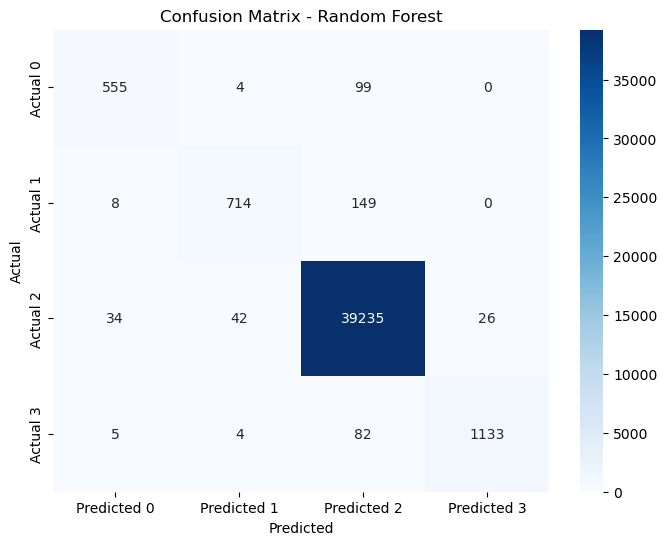

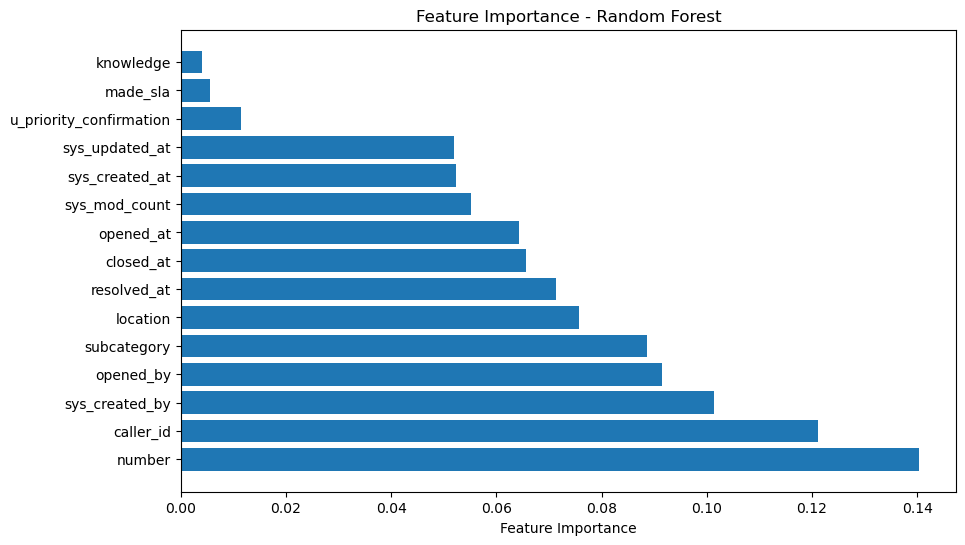

Model: Random Forest
Accuracy: 0.9892373485388454
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       658
           1       0.93      0.82      0.87       871
           2       0.99      1.00      0.99     39337
           3       0.98      0.93      0.95      1224

    accuracy                           0.99     42090
   macro avg       0.96      0.90      0.92     42090
weighted avg       0.99      0.99      0.99     42090



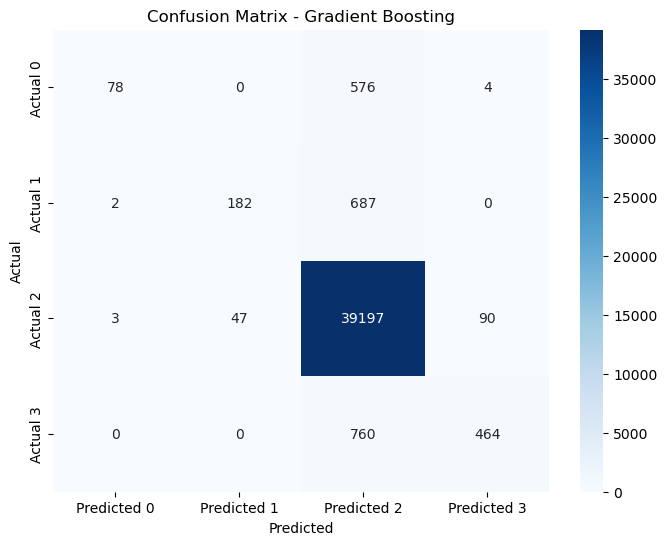

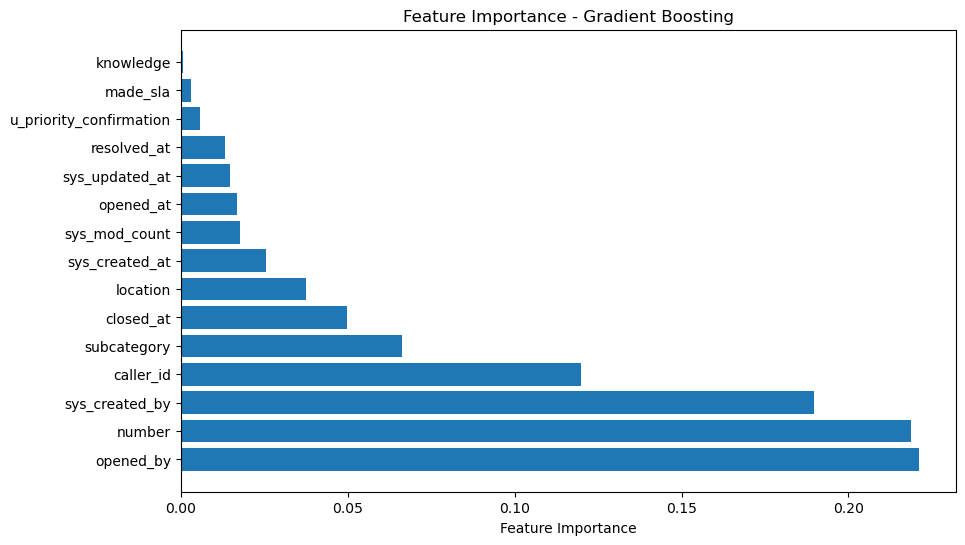

Model: Gradient Boosting
Accuracy: 0.9484675694939415
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.12      0.21       658
           1       0.79      0.21      0.33       871
           2       0.95      1.00      0.97     39337
           3       0.83      0.38      0.52      1224

    accuracy                           0.95     42090
   macro avg       0.88      0.43      0.51     42090
weighted avg       0.94      0.95      0.93     42090



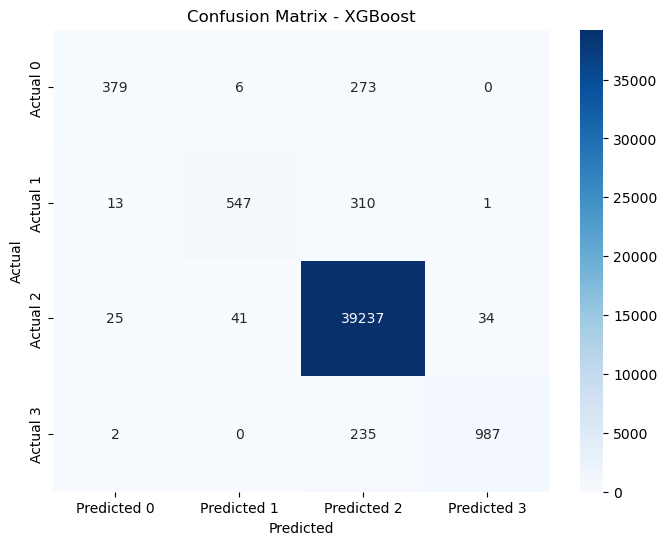

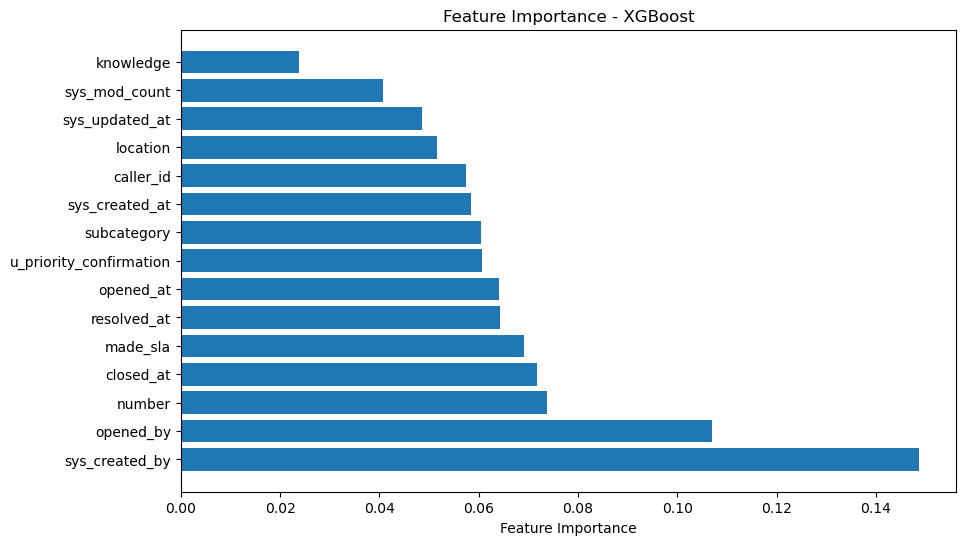

Model: XGBoost
Accuracy: 0.9776669042527917
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.58      0.70       658
           1       0.92      0.63      0.75       871
           2       0.98      1.00      0.99     39337
           3       0.97      0.81      0.88      1224

    accuracy                           0.98     42090
   macro avg       0.94      0.75      0.83     42090
weighted avg       0.98      0.98      0.98     42090



In [207]:
# Define a list of models to test
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42))
    # Add more models as needed
]

# Test each model
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2','Predicted 3'], yticklabels=['Actual 0', 'Actual 1','Actual 2','Actual 3'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Feature Importance
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        feature_names = X_train.columns
        importance = sorted(zip(feature_importance, feature_names), reverse=True)
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(importance)), [imp[0] for imp in importance], align='center')
        plt.yticks(range(len(importance)), [imp[1] for imp in importance])
        plt.xlabel('Feature Importance')
        plt.title(f'Feature Importance - {model_name}')
        plt.show()

    # Print the results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_rep)
    print("="*50)


In [208]:
#  UNDER SAMPLING
from imblearn.under_sampling import  

undersampler = RandomUnderSampler(random_state=42)
x, y = undersampler.fit_resample(X_train, y_train)

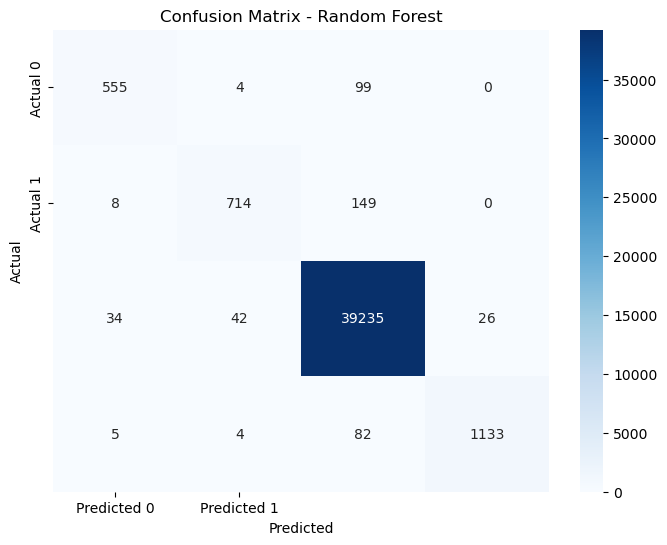

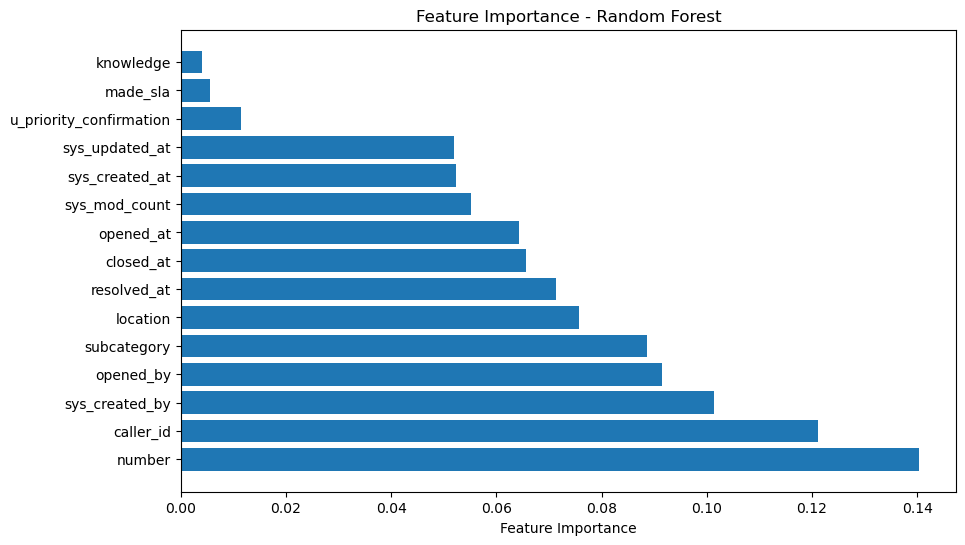

Model: Random Forest
Accuracy: 0.9892373485388454
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       658
           1       0.93      0.82      0.87       871
           2       0.99      1.00      0.99     39337
           3       0.98      0.93      0.95      1224

    accuracy                           0.99     42090
   macro avg       0.96      0.90      0.92     42090
weighted avg       0.99      0.99      0.99     42090



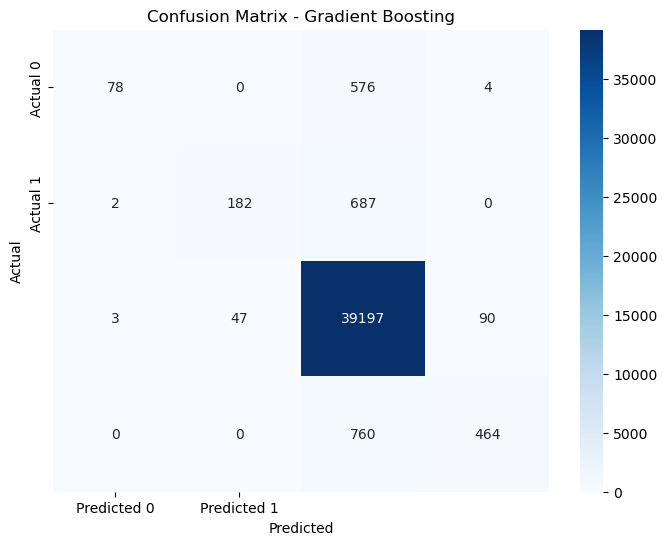

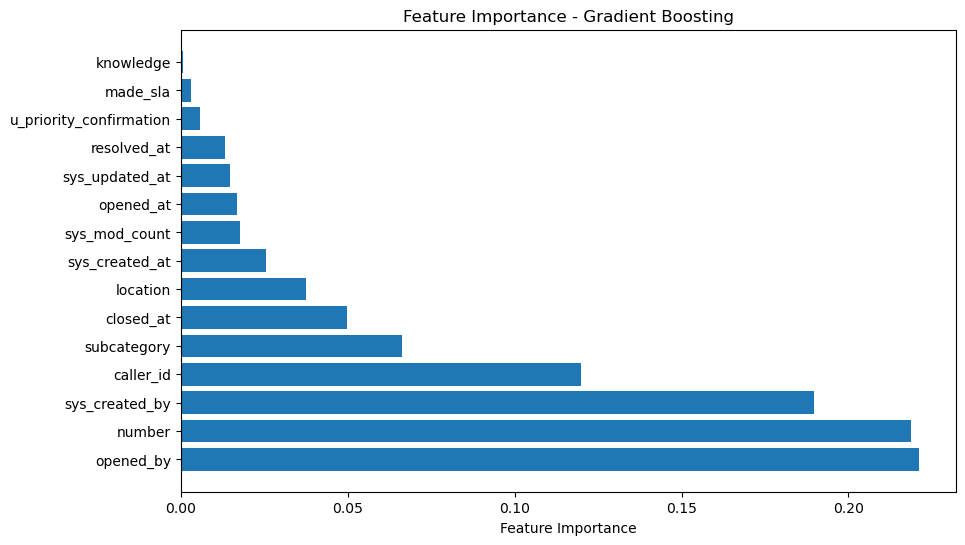

Model: Gradient Boosting
Accuracy: 0.9484675694939415
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.12      0.21       658
           1       0.79      0.21      0.33       871
           2       0.95      1.00      0.97     39337
           3       0.83      0.38      0.52      1224

    accuracy                           0.95     42090
   macro avg       0.88      0.43      0.51     42090
weighted avg       0.94      0.95      0.93     42090



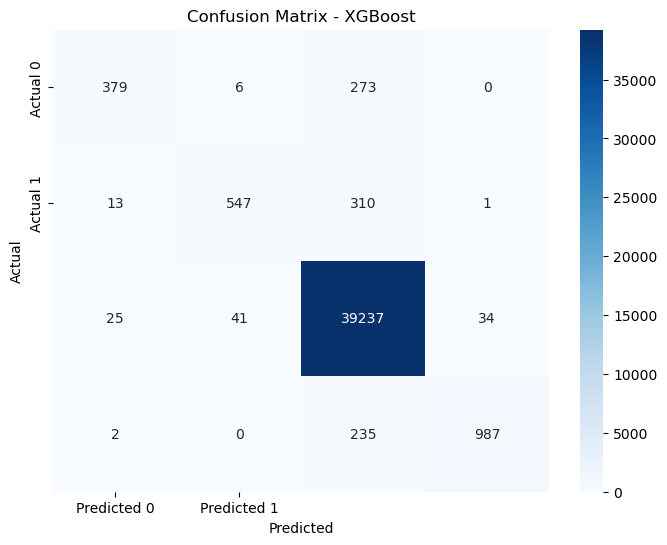

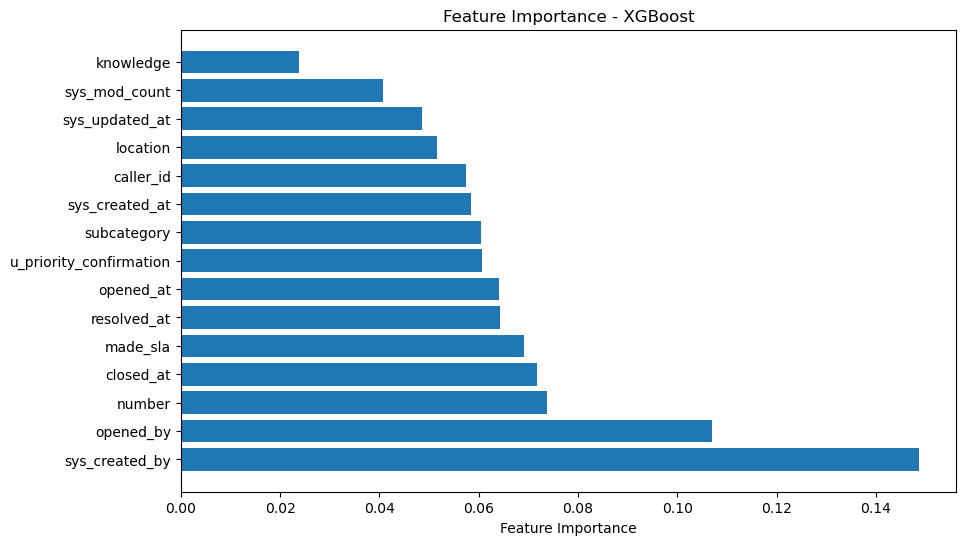

Model: XGBoost
Accuracy: 0.9776669042527917
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.58      0.70       658
           1       0.92      0.63      0.75       871
           2       0.98      1.00      0.99     39337
           3       0.97      0.81      0.88      1224

    accuracy                           0.98     42090
   macro avg       0.94      0.75      0.83     42090
weighted avg       0.98      0.98      0.98     42090



In [209]:
# Define a list of models to test
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42))
    # Add more models as needed
]

# Test each model
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Feature Importance
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        feature_names = X_train.columns
        importance = sorted(zip(feature_importance, feature_names), reverse=True)
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(importance)), [imp[0] for imp in importance], align='center')
        plt.yticks(range(len(importance)), [imp[1] for imp in importance])
        plt.xlabel('Feature Importance')
        plt.title(f'Feature Importance - {model_name}')
        plt.show()

    # Print the results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_rep)
    print("="*50)


In [ ]:
# make classification

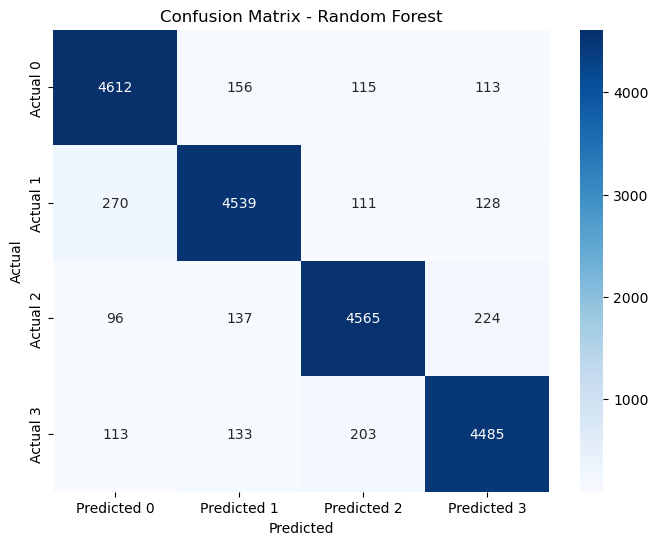

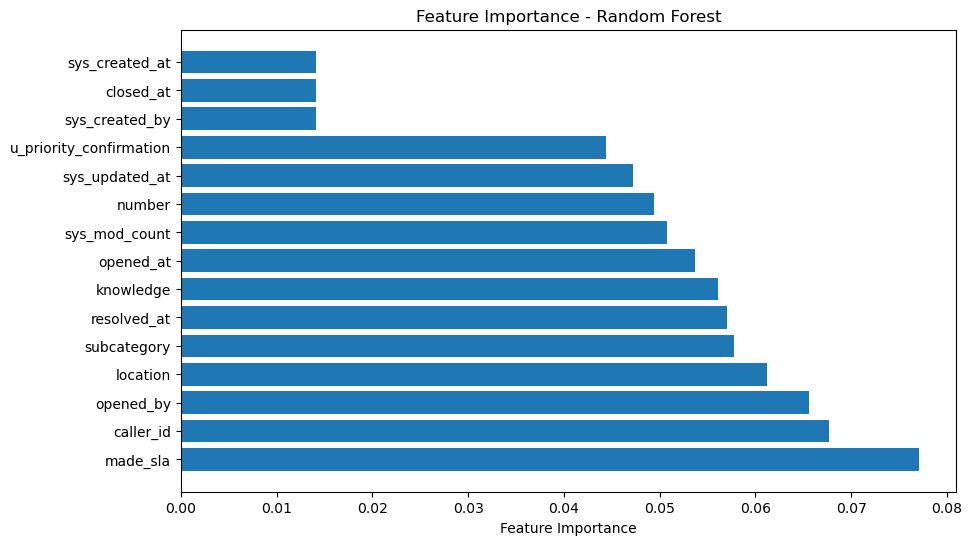

Model: Random Forest
Accuracy: 0.91005
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      4996
           1       0.91      0.90      0.91      5048
           2       0.91      0.91      0.91      5022
           3       0.91      0.91      0.91      4934

    accuracy                           0.91     20000
   macro avg       0.91      0.91      0.91     20000
weighted avg       0.91      0.91      0.91     20000



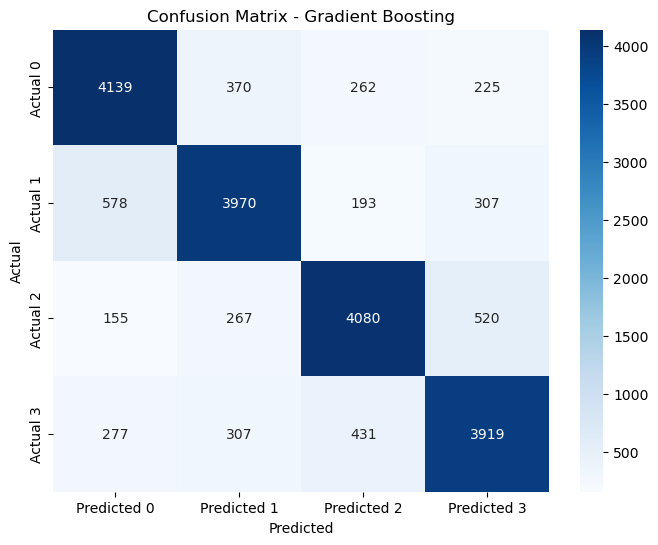

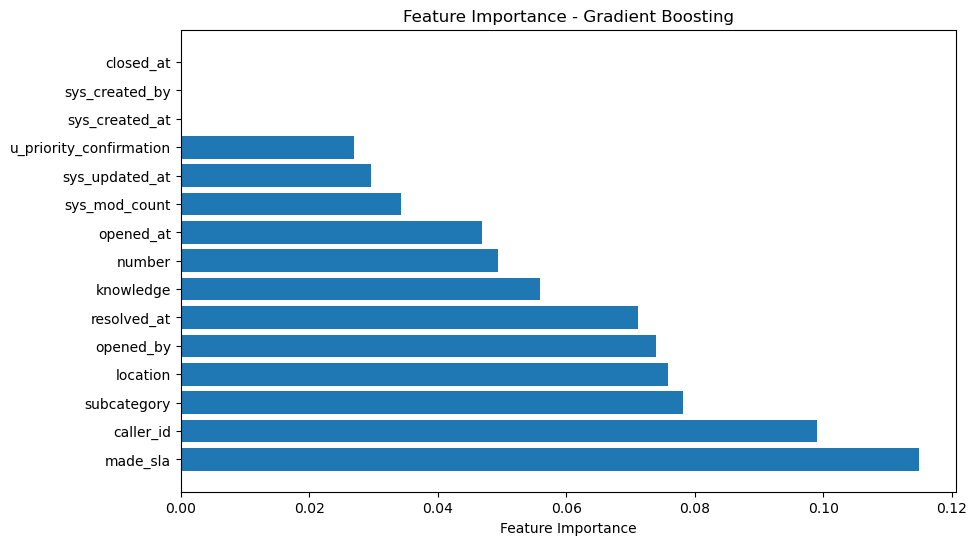

Model: Gradient Boosting
Accuracy: 0.8054
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      4996
           1       0.81      0.79      0.80      5048
           2       0.82      0.81      0.82      5022
           3       0.79      0.79      0.79      4934

    accuracy                           0.81     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.81      0.81      0.81     20000



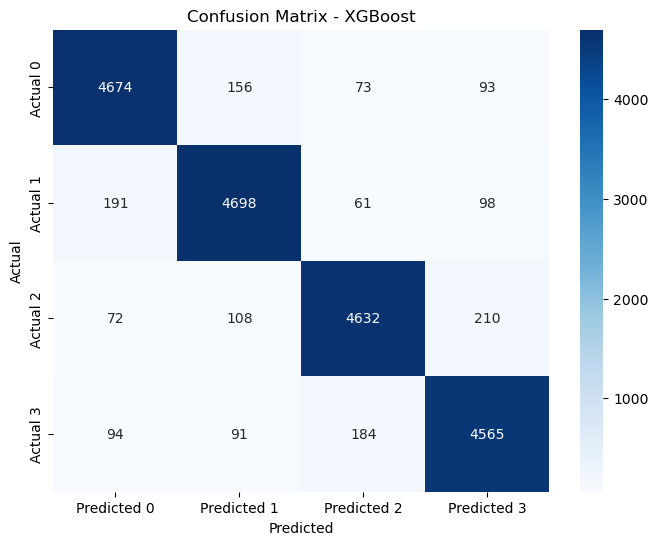

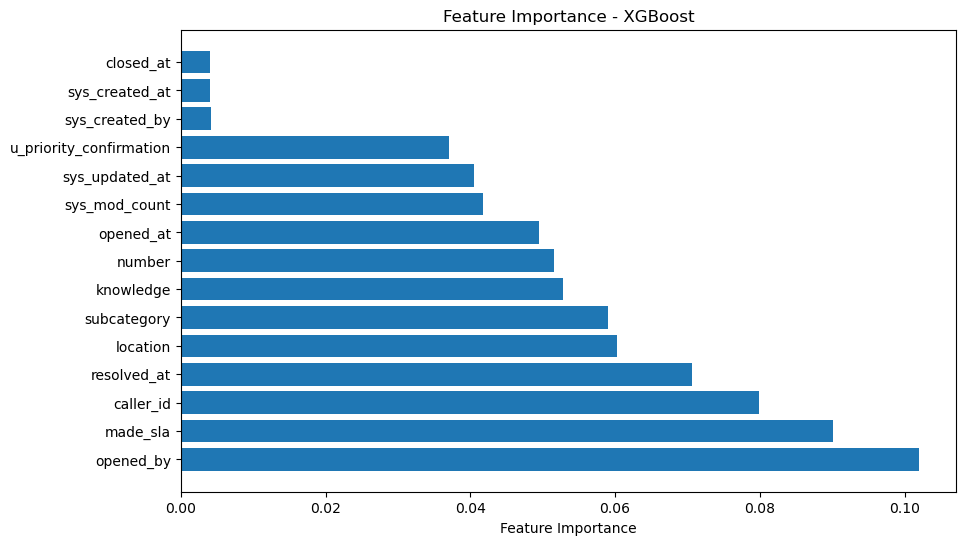

Model: XGBoost
Accuracy: 0.92845
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4996
           1       0.93      0.93      0.93      5048
           2       0.94      0.92      0.93      5022
           3       0.92      0.93      0.92      4934

    accuracy                           0.93     20000
   macro avg       0.93      0.93      0.93     20000
weighted avg       0.93      0.93      0.93     20000



In [204]:
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(n_samples=100000, n_features=20, n_informative=15, n_classes=4, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of models to test
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42))
    # Add more models as needed
]

# Test each model
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2', 'Actual 3'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Feature Importance
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        feature_names = X_train_MM.columns
        importance = sorted(zip(feature_importance, feature_names), reverse=True)
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(importance)), [imp[0] for imp in importance], align='center')
        plt.yticks(range(len(importance)),[imp[1] for imp in importance])
        plt.xlabel('Feature Importance')
        plt.title(f'Feature Importance - {model_name}')
        plt.show()

    # Print the results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_rep)
    print("="*50)

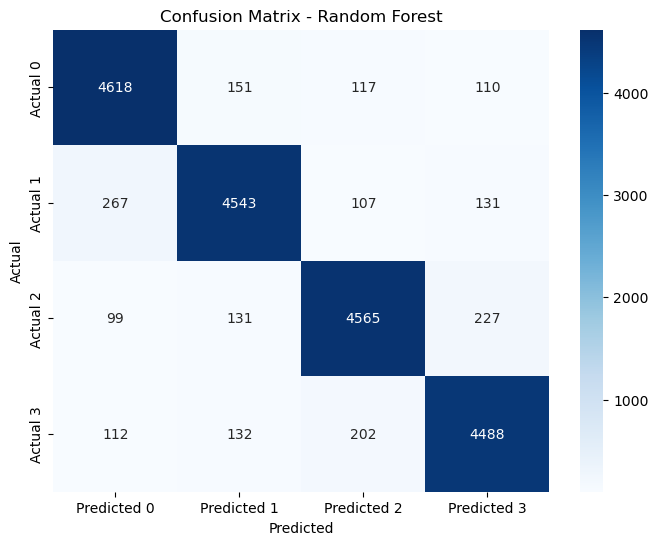

Model: Random Forest
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9107
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      4996
           1       0.92      0.90      0.91      5048
           2       0.91      0.91      0.91      5022
           3       0.91      0.91      0.91      4934

    accuracy                           0.91     20000
   macro avg       0.91      0.91      0.91     20000
weighted avg       0.91      0.91      0.91     20000



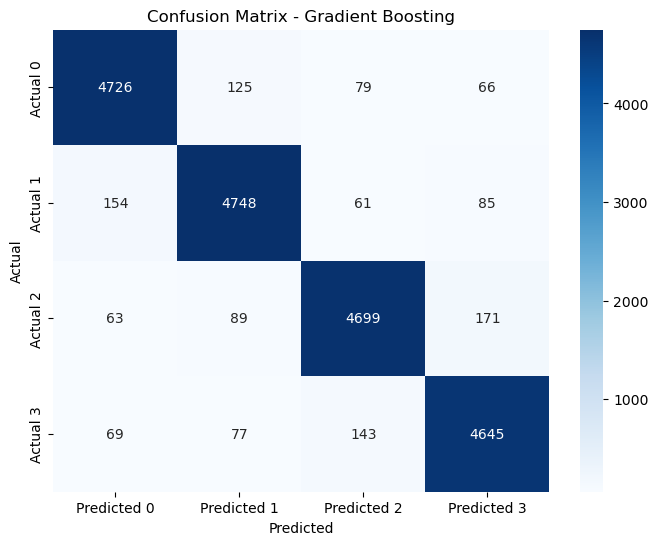

Model: Gradient Boosting
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Accuracy: 0.9409
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4996
           1       0.94      0.94      0.94      5048
           2       0.94      0.94      0.94      5022
           3       0.94      0.94      0.94      4934

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



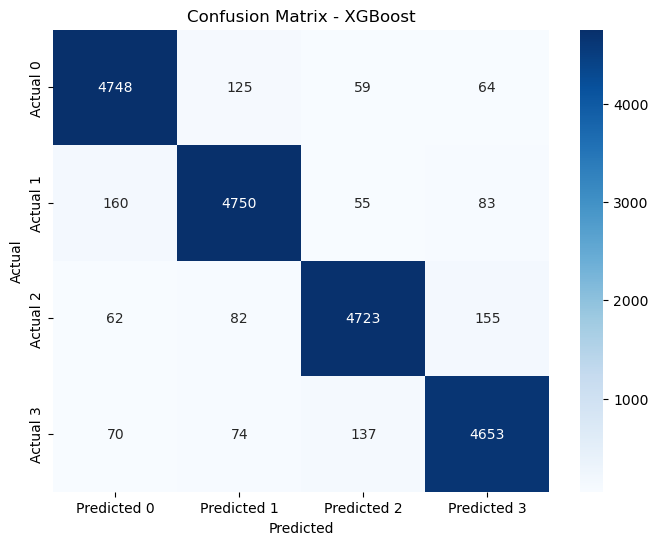

Model: XGBoost
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Accuracy: 0.9437
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4996
           1       0.94      0.94      0.94      5048
           2       0.95      0.94      0.94      5022
           3       0.94      0.94      0.94      4934

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



In [205]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
X, y = make_classification(n_samples=100000, n_features=20, n_informative=15, n_classes=4, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of models with associated hyperparameter grids
models_with_params = [
    ('Random Forest', RandomForestClassifier(random_state=42), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}),
    ('XGBoost', XGBClassifier(random_state=42), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]})
    # Add more models and hyperparameter grids as needed
]

# Test each model with hyperparameter tuning
for model_name, model, param_grid in models_with_params:
    # Perform grid search
    grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=3)
    grid_search.fit(X_train, y_train)

    # Get the best model from grid search
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Predicted {i}' for i in range(4)], yticklabels=[f'Actual {i}' for i in range(4)])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
        # Feature Importance
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        feature_names = X_train_MM.columns
        importance = sorted(zip(feature_importance, feature_names), reverse=True)
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(importance)), [imp[0] for imp in importance], align='center')
        plt.yticks(range(len(importance)),[imp[1] for imp in importance])
        plt.xlabel('Feature Importance')
        plt.title(f'Feature Importance - {model_name}')
        plt.show()

    # Print the results
    print(f"Model: {model_name}")
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_rep)
    print("="*50)
